<a href="https://colab.research.google.com/github/Ruchika222/GitTutorial/blob/master/Forest_Fire_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Forest Fire Prediction:

# Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder

D:\Anaconda\envs\forestfireprediction\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [ ]:
%pwd

'D:\\MSC\\Trimester3\\ML2\\Datasets\\NASA\\Australia'

# The Data

In [ ]:
dataset1=pd.read_csv("fire_archive_M6_189748.csv")

In [ ]:
dataset1.head()

latitude  longitude  brightness  scan  track    acq_date  acq_time  \
0  -18.2242   144.9556       327.1   1.9    1.4  2018-01-01        15   
1  -18.0564   144.6842       327.2   2.1    1.4  2018-01-01        15   
2  -18.0529   144.6651       340.4   2.1    1.4  2018-01-01        15   
3  -18.0558   144.6914       324.4   2.1    1.4  2018-01-01        15   
4  -18.0524   144.6723       343.9   2.1    1.4  2018-01-01        15   

  satellite instrument  confidence  version  bright_t31    frp daynight  type  
0     Terra      MODIS          45     6.03       304.7   20.0        D     0  
1     Terra      MODIS          55     6.03       296.6   32.2        D     0  
2     Terra      MODIS          88     6.03       297.1   83.9        D     0  
3     Terra      MODIS          42     6.03       297.1   22.8        D     0  
4     Terra      MODIS          90     6.03       297.6  102.1        D     0

In [ ]:
dataset1.shape

(307820, 15)

In [ ]:
dataset2=pd.read_csv("fire_archive_M6_189749.csv")

In [ ]:
dataset2.head()

latitude  longitude  brightness  scan  track    acq_date  acq_time  \
0  -14.1017   127.4337       334.9   2.6    1.5  2019-01-01       122   
1  -14.0055   127.4097       328.8   2.6    1.5  2019-01-01       122   
2  -14.0012   127.3857       349.5   2.6    1.5  2019-01-01       122   
3  -13.9916   127.4121       327.4   2.6    1.5  2019-01-01       122   
4  -13.9873   127.3882       324.2   2.6    1.5  2019-01-01       122   

  satellite instrument  confidence  version  bright_t31    frp daynight  type  
0     Terra      MODIS          86     6.03       292.9   83.1        D     0  
1     Terra      MODIS          27     6.03       295.8   44.1        D     0  
2     Terra      MODIS          83     6.03       296.3  182.4        D     0  
3     Terra      MODIS          61     6.03       295.5   45.0        D     0  
4     Terra      MODIS          39     6.03       294.8   31.0        D     0

In [ ]:
dataset2.shape

(310991, 15)

In [ ]:
dataset3=pd.read_csv("fire_archive_M6_189750.csv")

In [ ]:
dataset3.head()

latitude  longitude  brightness  scan  track    acq_date  acq_time  \
0  -13.2051   143.1472       337.2   1.0    1.0  2020-01-01        50   
1  -16.3635   137.7061       329.5   1.5    1.2  2020-01-01        51   
2  -16.3611   137.6920       335.8   1.5    1.2  2020-01-01        51   
3  -16.3587   137.6780       327.2   1.5    1.2  2020-01-01        51   
4  -16.3597   137.6991       329.5   1.5    1.2  2020-01-01        51   

  satellite instrument  confidence  version  bright_t31   frp daynight  type  
0     Terra      MODIS          87     6.03       298.0  27.9        D     0  
1     Terra      MODIS          52     6.03       297.7  29.1        D     0  
2     Terra      MODIS          77     6.03       299.6  40.8        D     0  
3     Terra      MODIS          20     6.03       298.4  20.3        D     0  
4     Terra      MODIS          53     6.03       299.3  25.0        D     0

In [ ]:
dataset3.shape

(149997, 15)

In [ ]:
dataset4=pd.read_csv("fire_nrt_M6_189750.csv")

In [ ]:
dataset4.head()

latitude  longitude  brightness  scan  track    acq_date  acq_time  \
0   -17.392    145.043       334.4   2.6    1.5  2020-12-01         5   
1   -17.406    145.039       328.9   2.6    1.5  2020-12-01         5   
2   -17.764    144.088       323.7   3.0    1.6  2020-12-01         5   
3   -18.208    145.238       323.4   2.4    1.5  2020-12-01         5   
4   -18.298    142.422       324.1   3.9    1.8  2020-12-01         5   

  satellite instrument  confidence version  bright_t31   frp daynight  
0     Terra      MODIS          78  6.0NRT       303.2  79.4        D  
1     Terra      MODIS          66  6.0NRT       300.5  56.9        D  
2     Terra      MODIS          52  6.0NRT       302.8  31.7        D  
3     Terra      MODIS          64  6.0NRT       302.8  33.6        D  
4     Terra      MODIS          49  6.0NRT       298.8  47.0        D

In [ ]:
dataset4.shape

(6203, 14)

In [ ]:
dataset=pd.concat([dataset1,dataset2,dataset3,dataset4],ignore_index=True)
dataset.head()

latitude  longitude  brightness  scan  track    acq_date  acq_time  \
0  -18.2242   144.9556       327.1   1.9    1.4  2018-01-01        15   
1  -18.0564   144.6842       327.2   2.1    1.4  2018-01-01        15   
2  -18.0529   144.6651       340.4   2.1    1.4  2018-01-01        15   
3  -18.0558   144.6914       324.4   2.1    1.4  2018-01-01        15   
4  -18.0524   144.6723       343.9   2.1    1.4  2018-01-01        15   

  satellite instrument  confidence version  bright_t31    frp daynight  type  
0     Terra      MODIS          45    6.03       304.7   20.0        D   0.0  
1     Terra      MODIS          55    6.03       296.6   32.2        D   0.0  
2     Terra      MODIS          88    6.03       297.1   83.9        D   0.0  
3     Terra      MODIS          42    6.03       297.1   22.8        D   0.0  
4     Terra      MODIS          90    6.03       297.6  102.1        D   0.0

In [ ]:
dataset.shape

(775011, 15)

There are 775011 rows and 15 columns

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 775011 entries, 0 to 775010
Data columns (total 15 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   latitude    775011 non-null  float64
 1   longitude   775011 non-null  float64
 2   brightness  775011 non-null  float64
 3   scan        775011 non-null  float64
 4   track       775011 non-null  float64
 5   acq_date    775011 non-null  object 
 6   acq_time    775011 non-null  int64  
 7   satellite   775011 non-null  object 
 8   instrument  775011 non-null  object 
 9   confidence  775011 non-null  int64  
 10  version     775011 non-null  object 
 11  bright_t31  775011 non-null  float64
 12  frp         775011 non-null  float64
 13  daynight    775011 non-null  object 
 14  type        768808 non-null  float64
dtypes: float64(8), int64(2), object(5)
memory usage: 88.7+ MB


In [ ]:
dataset.describe()

latitude      longitude     brightness           scan  \
count  775011.000000  775011.000000  775011.000000  775011.000000   
mean      -22.215998     136.148421     332.908161       1.647221   
std         8.164047      10.763393      23.278803       0.838930   
min       -43.500600     113.129400     300.000000       1.000000   
25%       -29.625850     127.197550     317.900000       1.100000   
50%       -20.202700     134.270100     328.600000       1.300000   
75%       -14.977300     146.899350     341.600000       1.900000   
max        -9.111300     153.591900     507.000000       4.800000   

               track       acq_time     confidence     bright_t31  \
count  775011.000000  775011.000000  775011.000000  775011.000000   
mean        1.222677     636.746183      70.917867     303.102041   
std         0.254531     542.292136      23.185413      10.846041   
min         1.000000       0.000000       0.000000     265.700000   
25%         1.000000     234.000000      56.000000     295.700000   
50%         1.100000     443.000000      74.000000     302.800000   
75%         1.400000    1224.000000      90.000000     309.600000   
max         2.000000    2359.000000     100.000000     400.100000   

                 frp           type  
count  775011.000000  768808.000000  
mean       69.523629       0.020606  
std       171.187134       0.214768  
min       -29.900000       0.000000  
25%        14.500000       0.000000  
50%        28.400000       0.000000  
75%        62.400000       0.000000  
max     11164.100000       3.000000

Mean values are distributed over a large range.

In [ ]:
dataset.isnull().sum()

latitude         0
longitude        0
brightness       0
scan             0
track            0
acq_date         0
acq_time         0
satellite        0
instrument       0
confidence       0
version          0
bright_t31       0
frp              0
daynight         0
type          6203
dtype: int64

<AxesSubplot:>

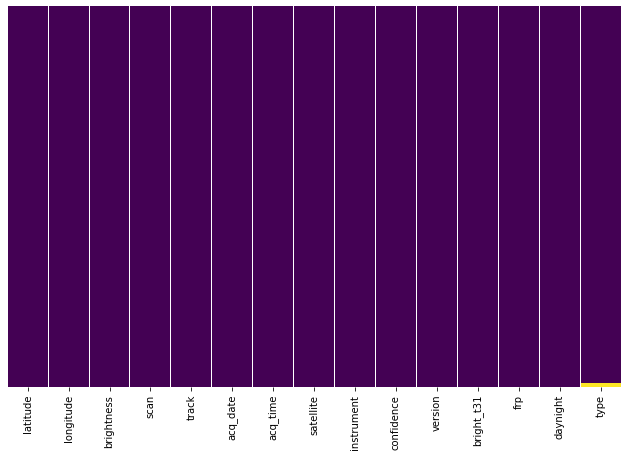

In [ ]:
plt.figure(figsize=(11,7))
sns.heatmap(dataset.isnull(),yticklabels=False,cbar=False,cmap='viridis')

The proportion of Type missing is likely small enough.Type has 0.8% of missing values.

array([[<AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'brightness'}>],
       [<AxesSubplot:title={'center':'scan'}>,
        <AxesSubplot:title={'center':'track'}>,
        <AxesSubplot:title={'center':'acq_time'}>],
       [<AxesSubplot:title={'center':'confidence'}>,
        <AxesSubplot:title={'center':'bright_t31'}>,
        <AxesSubplot:title={'center':'frp'}>],
       [<AxesSubplot:title={'center':'type'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

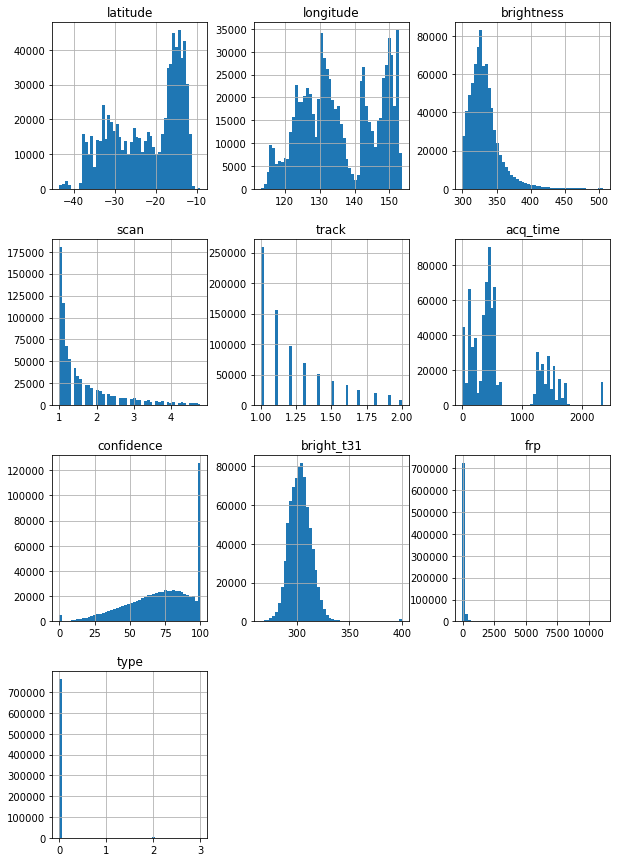

In [ ]:
dataset.hist(bins=50,figsize=(10,15))

1. By looking at the bright_t31 graph it is having small spread as it is having a small standard deviation value. But after looking at the minimum and maximum value of bright_t31 which are 265 and 400 we can say that the data is right skewed and therefore bright_t31 is showing right-skewed distribution.
2. brightness is showing right-skewed distribution.
3. The mininmum and the maximum value of confidence are 0 and 100 respectively and in the graph we can see that the most of the data lies in the range of 70 to 90 and also it is showing a large peak at 100
4. scan is showing right-skewed distribution.
5. acq_time,latitude,longitude are showing random distribution as it is having several peaks.

## Countplot for type:

<AxesSubplot:xlabel='type', ylabel='count'>

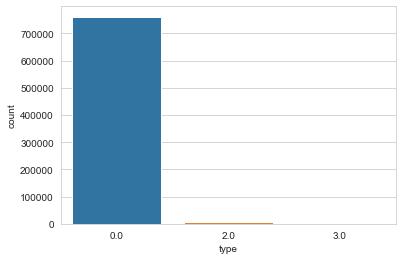

In [ ]:
sns.set_style("whitegrid")
sns.countplot(x="type",data=dataset)

0.0 = presumed vegetation fire<br>
1.0 = active volcano<br>
2.0 = other static land source<br>
3.0 = offshore<br>
As we can see most of the records are of the type 0 i.e. presumed vegetation fire

In [ ]:
dataset["type"].value_counts()

0.0    761571
2.0      5869
3.0      1368
Name: type, dtype: int64

## Countplot for daynight:

<AxesSubplot:xlabel='daynight', ylabel='count'>

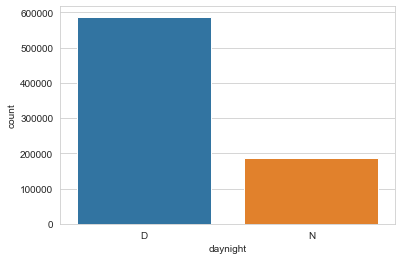

In [ ]:
sns.set_style("whitegrid")
sns.countplot(x="daynight",data=dataset)

As we can see most of the records has d value in the daynight column. So most of the fires may have occured during daytime.

In [ ]:
dataset["daynight"].value_counts()

D    588012
N    186999
Name: daynight, dtype: int64

<AxesSubplot:xlabel='acq_date', ylabel='frp'>

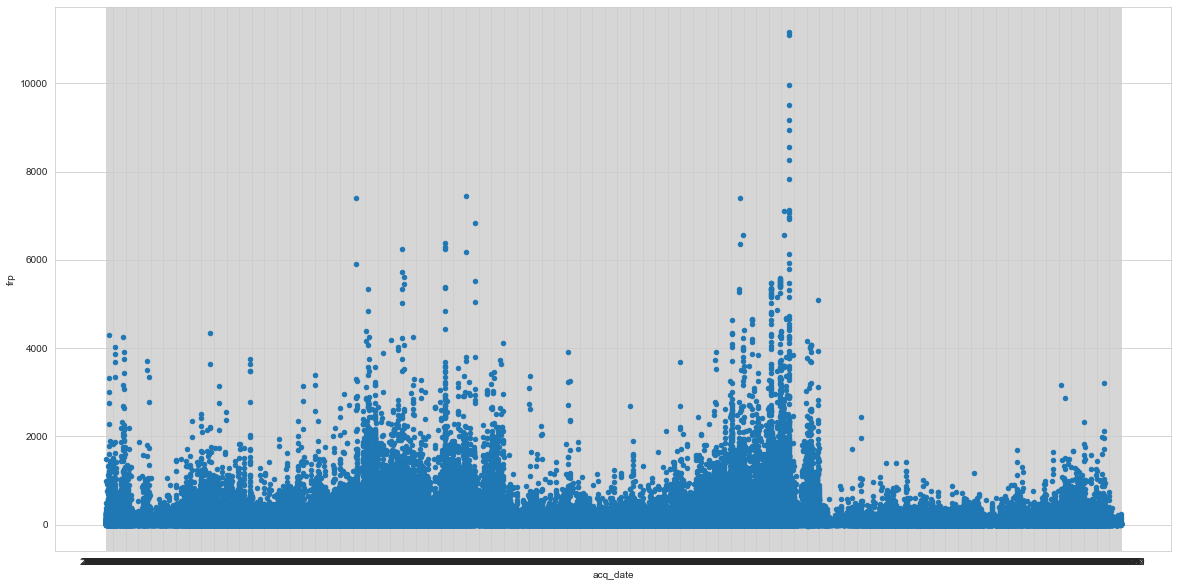

In [ ]:
dataset.plot(kind="scatter", x="acq_date", y="frp",figsize=(20,10))

## Extracting day, month and year from acq_date column.

In [ ]:
dataset['day'] = pd.DatetimeIndex(dataset['acq_date']).day

In [ ]:
dataset['month'] = pd.DatetimeIndex(dataset['acq_date']).month

In [ ]:
dataset['year'] = pd.DatetimeIndex(dataset['acq_date']).year

In [ ]:
dataset.head()

latitude  longitude  brightness  scan  track    acq_date  acq_time  \
0  -18.2242   144.9556       327.1   1.9    1.4  2018-01-01        15   
1  -18.0564   144.6842       327.2   2.1    1.4  2018-01-01        15   
2  -18.0529   144.6651       340.4   2.1    1.4  2018-01-01        15   
3  -18.0558   144.6914       324.4   2.1    1.4  2018-01-01        15   
4  -18.0524   144.6723       343.9   2.1    1.4  2018-01-01        15   

  satellite instrument  confidence version  bright_t31    frp daynight  type  \
0     Terra      MODIS          45    6.03       304.7   20.0        D   0.0   
1     Terra      MODIS          55    6.03       296.6   32.2        D   0.0   
2     Terra      MODIS          88    6.03       297.1   83.9        D   0.0   
3     Terra      MODIS          42    6.03       297.1   22.8        D   0.0   
4     Terra      MODIS          90    6.03       297.6  102.1        D   0.0   

   day  month  year  
0    1      1  2018  
1    1      1  2018  
2    1      1  2018  
3    1      1  2018  
4    1      1  2018

In [ ]:
dataset.shape

(775011, 18)

<AxesSubplot:xlabel='year', ylabel='frp'>

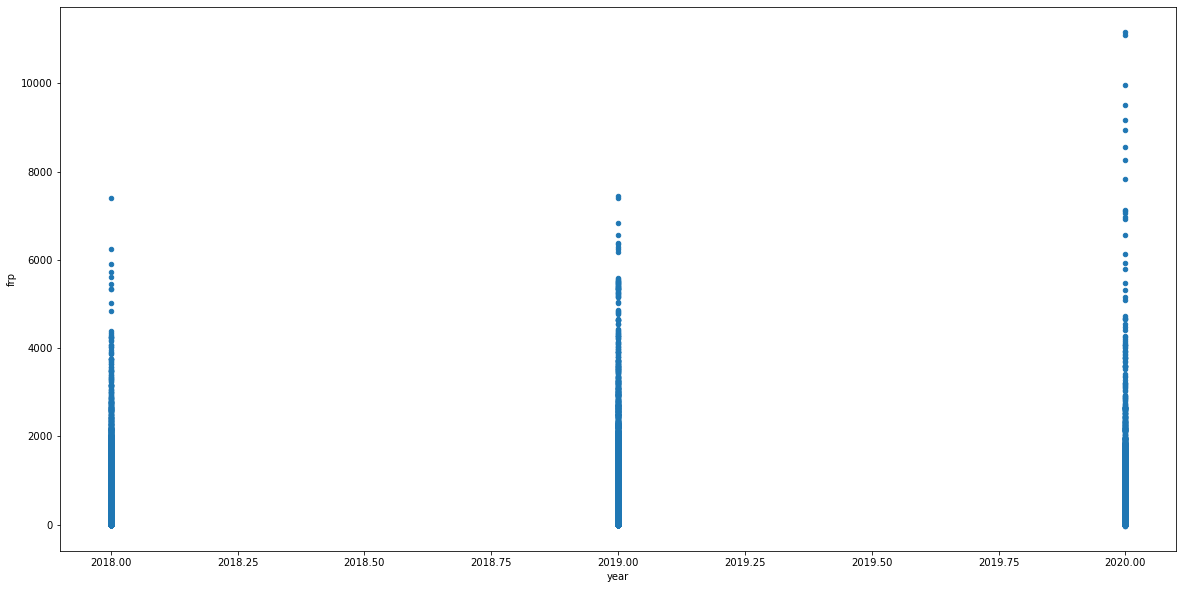

In [ ]:
dataset.plot(kind="scatter", x="year", y="frp",figsize=(20,10))

Here we can see that the highest value of the frp is being achieved in the year 2020.

## Max FRP value:

In [ ]:
dataset["frp"].max()

11164.1

In [ ]:
row = dataset[dataset['frp']== 11164.1]
row

latitude  longitude  brightness  scan  track    acq_date  acq_time  \
641891  -32.8923   124.0954       486.1   4.5    1.9  2020-01-08       241   

       satellite instrument  confidence version  bright_t31      frp daynight  \
641891     Terra      MODIS         100    6.03       321.6  11164.1        D   

        type  day  month  year  
641891   0.0    8      1  2020

Here we can see that in the year 2020 the maximum value for frp i.e. 11164.1 is achieved during the daytime

## Year 2018:

In [ ]:
year_2018=dataset[dataset["year"]==2018]
year_2018

latitude  longitude  brightness  scan  track    acq_date  acq_time  \
0       -18.2242   144.9556       327.1   1.9    1.4  2018-01-01        15   
1       -18.0564   144.6842       327.2   2.1    1.4  2018-01-01        15   
2       -18.0529   144.6651       340.4   2.1    1.4  2018-01-01        15   
3       -18.0558   144.6914       324.4   2.1    1.4  2018-01-01        15   
4       -18.0524   144.6723       343.9   2.1    1.4  2018-01-01        15   
...          ...        ...         ...   ...    ...         ...       ...   
307815  -24.6695   148.0981       322.1   3.0    1.7  2018-12-31      2347   
307816  -24.9143   148.3755       318.5   2.9    1.6  2018-12-31      2347   
307817  -24.9201   148.4032       322.9   2.8    1.6  2018-12-31      2347   
307818  -24.5249   148.2941       329.6   3.0    1.6  2018-12-31      2347   
307819  -34.4571   150.8804       325.0   1.3    1.1  2018-12-31      2349   

       satellite instrument  confidence version  bright_t31    frp daynight  \
0          Terra      MODIS          45    6.03       304.7   20.0        D   
1          Terra      MODIS          55    6.03       296.6   32.2        D   
2          Terra      MODIS          88    6.03       297.1   83.9        D   
3          Terra      MODIS          42    6.03       297.1   22.8        D   
4          Terra      MODIS          90    6.03       297.6  102.1        D   
...          ...        ...         ...     ...         ...    ...      ...   
307815     Terra      MODIS          58    6.03       302.4   45.0        D   
307816     Terra      MODIS          41    6.03       301.7   25.7        D   
307817     Terra      MODIS          66    6.03       302.0   45.6        D   
307818     Terra      MODIS          76    6.03       303.6   62.0        D   
307819     Terra      MODIS          49    6.03       305.4   12.7        D   

        type  day  month  year  
0        0.0    1      1  2018  
1        0.0    1      1  2018  
2        0.0    1      1  2018  
3        0.0    1      1  2018  
4        0.0    1      1  2018  
...      ...  ...    ...   ...  
307815   0.0   31     12  2018  
307816   0.0   31     12  2018  
307817   0.0   31     12  2018  
307818   0.0   31     12  2018  
307819   2.0   31     12  2018  

[307820 rows x 18 columns]

In [ ]:
year_2018["frp"].max()

7395.4

In [ ]:
row = dataset[dataset['frp']== 7395.4]
row

latitude  longitude  brightness  scan  track    acq_date  acq_time  \
179123  -22.8348   122.7901       455.9   4.8    2.0  2018-09-28       452   

       satellite instrument  confidence version  bright_t31     frp daynight  \
179123      Aqua      MODIS         100    6.03       325.3  7395.4        D   

        type  day  month  year  
179123   0.0   28      9  2018

Here we can see that in the year 2018 the maximum value for frp i.e. 7395.4 is achieved during the daytime

<AxesSubplot:xlabel='month', ylabel='frp'>

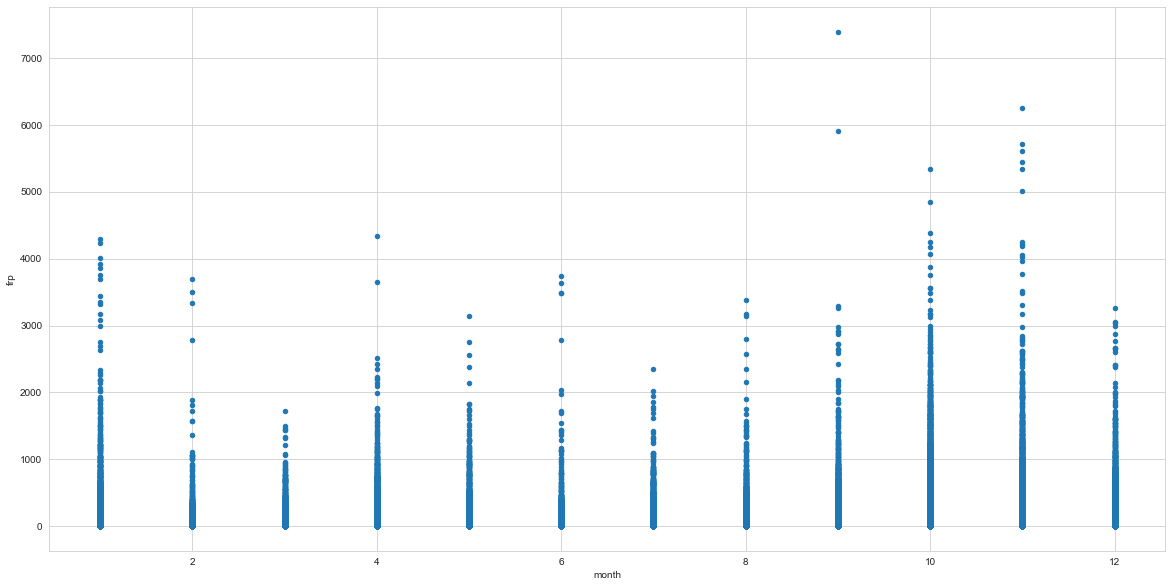

In [ ]:
year_2018.plot(kind="scatter", x="month", y="frp",figsize=(20,10))

In the month of September, October and November highest FRP value was being achieved.

## Year 2019:

In [ ]:
year_2019=dataset[dataset["year"]==2019]
year_2019

latitude  longitude  brightness  scan  track    acq_date  acq_time  \
307820  -14.1017   127.4337       334.9   2.6    1.5  2019-01-01       122   
307821  -14.0055   127.4097       328.8   2.6    1.5  2019-01-01       122   
307822  -14.0012   127.3857       349.5   2.6    1.5  2019-01-01       122   
307823  -13.9916   127.4121       327.4   2.6    1.5  2019-01-01       122   
307824  -13.9873   127.3882       324.2   2.6    1.5  2019-01-01       122   
...          ...        ...         ...   ...    ...         ...       ...   
618806  -33.9065   150.4540       314.6   4.0    1.9  2019-12-31      2318   
618807  -33.2100   151.4643       320.9   3.6    1.8  2019-12-31      2318   
618808  -32.5872   150.4455       315.3   4.4    1.9  2019-12-31      2318   
618809  -32.5715   150.6032       314.1   4.3    1.9  2019-12-31      2318   
618810  -41.5859   147.9286       314.4   3.4    1.7  2019-12-31      2320   

       satellite instrument  confidence version  bright_t31    frp daynight  \
307820     Terra      MODIS          86    6.03       292.9   83.1        D   
307821     Terra      MODIS          27    6.03       295.8   44.1        D   
307822     Terra      MODIS          83    6.03       296.3  182.4        D   
307823     Terra      MODIS          61    6.03       295.5   45.0        D   
307824     Terra      MODIS          39    6.03       294.8   31.0        D   
...          ...        ...         ...     ...         ...    ...      ...   
618806     Terra      MODIS          53    6.03       291.9   77.5        D   
618807     Terra      MODIS          64    6.03       292.1   89.6        D   
618808     Terra      MODIS          57    6.03       296.6   44.7        D   
618809     Terra      MODIS          48    6.03       296.7   46.1        D   
618810     Terra      MODIS          31    6.03       276.0   60.8        D   

        type  day  month  year  
307820   0.0    1      1  2019  
307821   0.0    1      1  2019  
307822   0.0    1      1  2019  
307823   0.0    1      1  2019  
307824   0.0    1      1  2019  
...      ...  ...    ...   ...  
618806   0.0   31     12  2019  
618807   0.0   31     12  2019  
618808   0.0   31     12  2019  
618809   0.0   31     12  2019  
618810   0.0   31     12  2019  

[310991 rows x 18 columns]

In [ ]:
year_2019["frp"].max()

7454.5

In [ ]:
row = dataset[dataset['frp']== 7454.5]
row

latitude  longitude  brightness  scan  track    acq_date  acq_time  \
328521  -37.3146   148.1351       484.4   3.4    1.7  2019-01-25       453   

       satellite instrument  confidence version  bright_t31     frp daynight  \
328521      Aqua      MODIS         100    6.03       317.0  7454.5        D   

        type  day  month  year  
328521   0.0   25      1  2019

Here we can see that in the year 2019 the maximum value for frp i.e. 7454.5 is achieved during the daytime

<AxesSubplot:xlabel='month', ylabel='frp'>

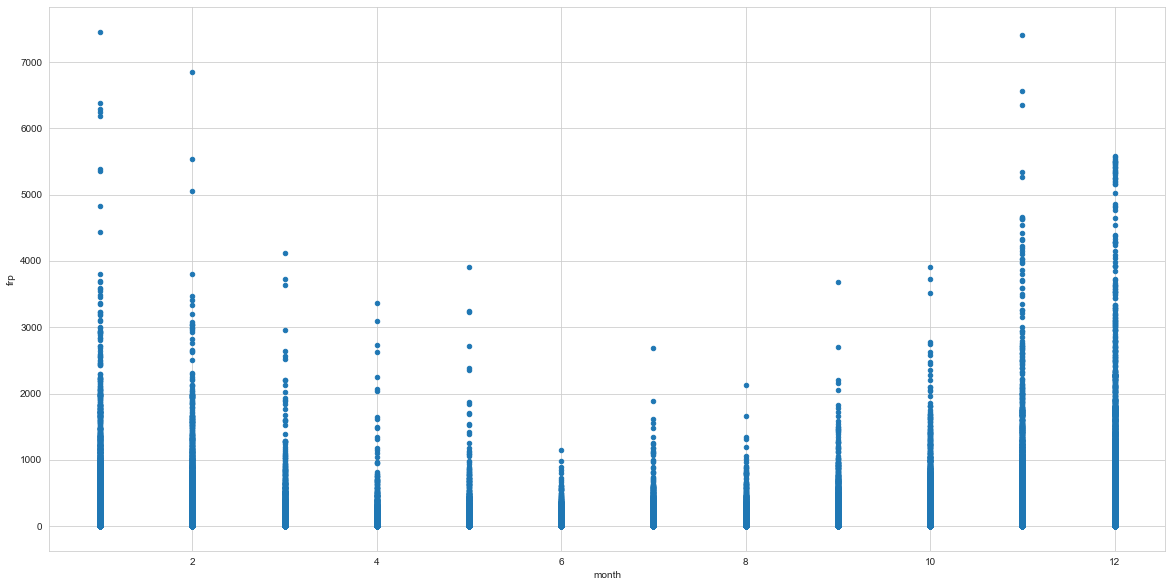

In [ ]:
year_2019.plot(kind="scatter", x="month", y="frp",figsize=(20,10))

In the month of January, February, November and December highest FRP value was being achieved.

## Year 2020:

In [ ]:
year_2020=dataset[dataset["year"]==2020]
year_2020

latitude  longitude  brightness  scan  track    acq_date  acq_time  \
618811  -13.2051   143.1472       337.2   1.0    1.0  2020-01-01        50   
618812  -16.3635   137.7061       329.5   1.5    1.2  2020-01-01        51   
618813  -16.3611   137.6920       335.8   1.5    1.2  2020-01-01        51   
618814  -16.3587   137.6780       327.2   1.5    1.2  2020-01-01        51   
618815  -16.3597   137.6991       329.5   1.5    1.2  2020-01-01        51   
...          ...        ...         ...   ...    ...         ...       ...   
775006  -28.2870   122.2660       309.9   2.2    1.5  2020-12-31      1405   
775007  -28.2860   122.2690       319.3   1.2    1.1  2020-12-31      1720   
775008  -30.8620   121.4950       308.0   1.2    1.1  2020-12-31      1720   
775009  -30.8620   121.4880       303.2   1.2    1.1  2020-12-31      1720   
775010  -28.2840   122.2570       345.2   1.2    1.1  2020-12-31      1720   

       satellite instrument  confidence version  bright_t31   frp daynight  \
618811     Terra      MODIS          87    6.03       298.0  27.9        D   
618812     Terra      MODIS          52    6.03       297.7  29.1        D   
618813     Terra      MODIS          77    6.03       299.6  40.8        D   
618814     Terra      MODIS          20    6.03       298.4  20.3        D   
618815     Terra      MODIS          53    6.03       299.3  25.0        D   
...          ...        ...         ...     ...         ...   ...      ...   
775006     Terra      MODIS          31  6.0NRT       289.1  32.8        N   
775007      Aqua      MODIS          65  6.0NRT       292.7  20.6        N   
775008      Aqua      MODIS          73  6.0NRT       292.4  10.3        N   
775009      Aqua      MODIS          54  6.0NRT       292.1   7.0        N   
775010      Aqua      MODIS         100  6.0NRT       297.0  69.0        N   

        type  day  month  year  
618811   0.0    1      1  2020  
618812   0.0    1      1  2020  
618813   0.0    1      1  2020  
618814   0.0    1      1  2020  
618815   0.0    1      1  2020  
...      ...  ...    ...   ...  
775006   NaN   31     12  2020  
775007   NaN   31     12  2020  
775008   NaN   31     12  2020  
775009   NaN   31     12  2020  
775010   NaN   31     12  2020  

[156200 rows x 18 columns]

In [ ]:
year_2020["frp"].max()

11164.1

In [ ]:
row = dataset[dataset['frp']== 11164.1]
row

latitude  longitude  brightness  scan  track    acq_date  acq_time  \
641891  -32.8923   124.0954       486.1   4.5    1.9  2020-01-08       241   

       satellite instrument  confidence version  bright_t31      frp daynight  \
641891     Terra      MODIS         100    6.03       321.6  11164.1        D   

        type  day  month  year  
641891   0.0    8      1  2020

Here we can see that in the year 2020 the maximum value for frp i.e. 11164.1 is achieved during the daytime

<AxesSubplot:xlabel='month', ylabel='frp'>

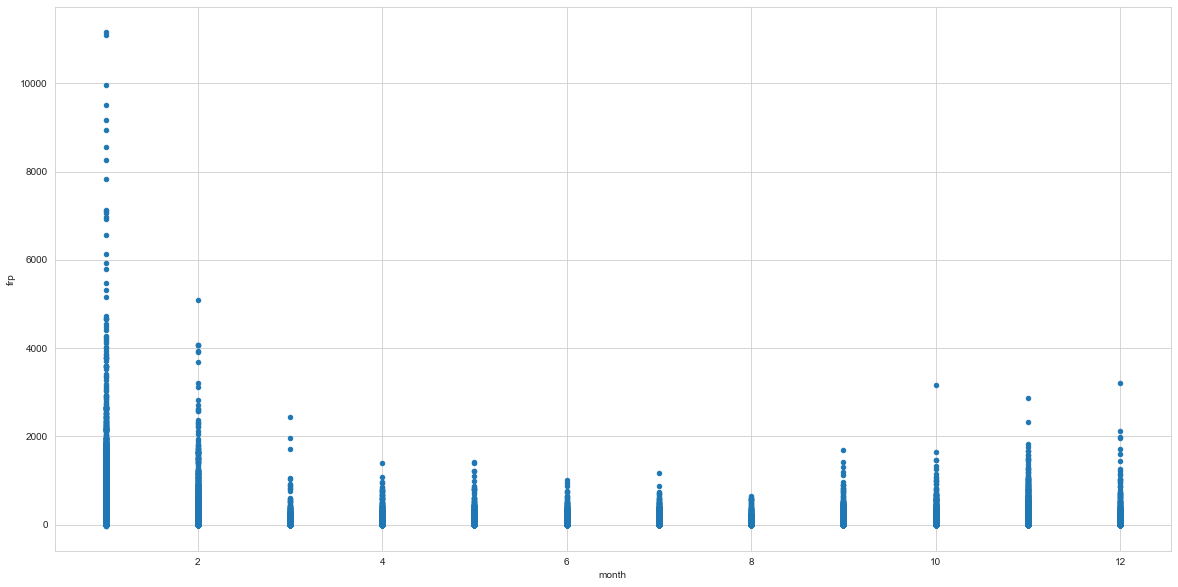

In [ ]:
year_2020.plot(kind="scatter", x="month", y="frp",figsize=(20,10))

In the month of January highest FRP value was being achieved.

<AxesSubplot:xlabel='acq_time', ylabel='frp'>

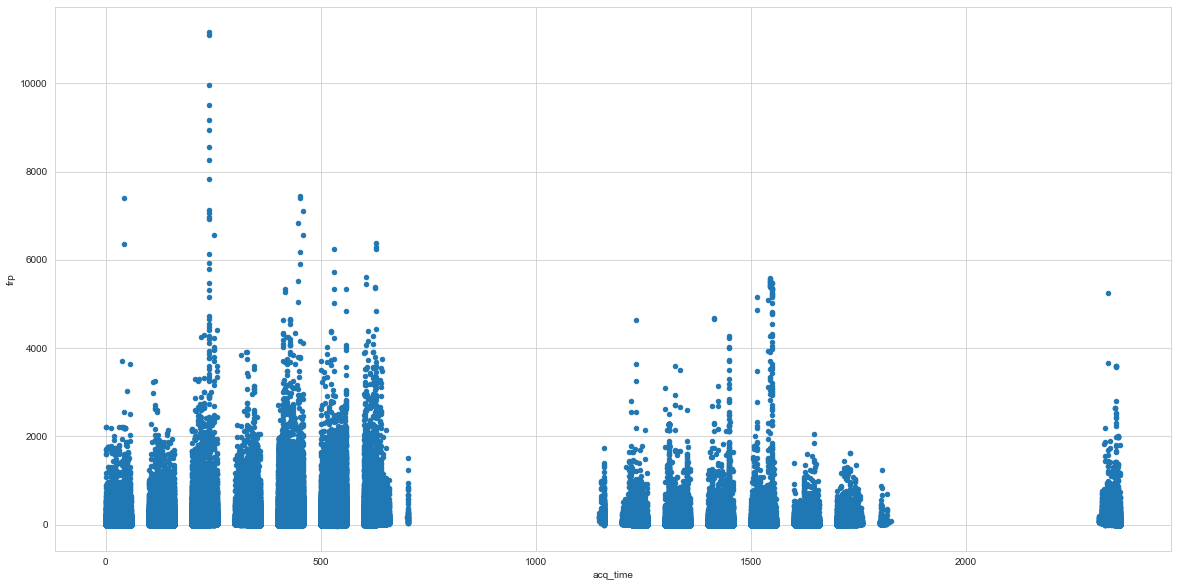

In [ ]:
dataset.plot(kind="scatter", x="acq_time", y="frp",figsize=(20,10))

<AxesSubplot:xlabel='bright_t31', ylabel='frp'>

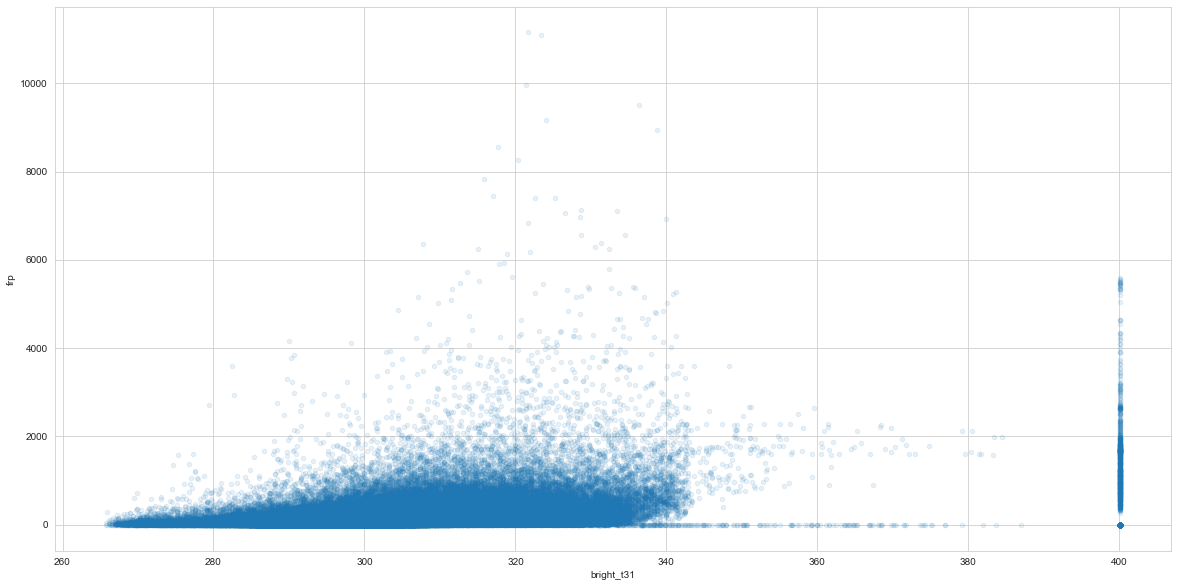

In [ ]:
dataset.plot(kind="scatter", x="bright_t31", y="frp",alpha=0.1,figsize=(20,10))

There is a tight positive correlation between bright_t31 and frp but for bright_t31 between the range of 340 to 390 and also at 400 there is a pattern of straight points indicating deviation from the standard scatter behaviour.<br>
when bright_t31 is 321.6 the maximum value of frp is being achieved and further as the bright_t31 value increases frp value decreases.

<AxesSubplot:xlabel='brightness', ylabel='frp'>

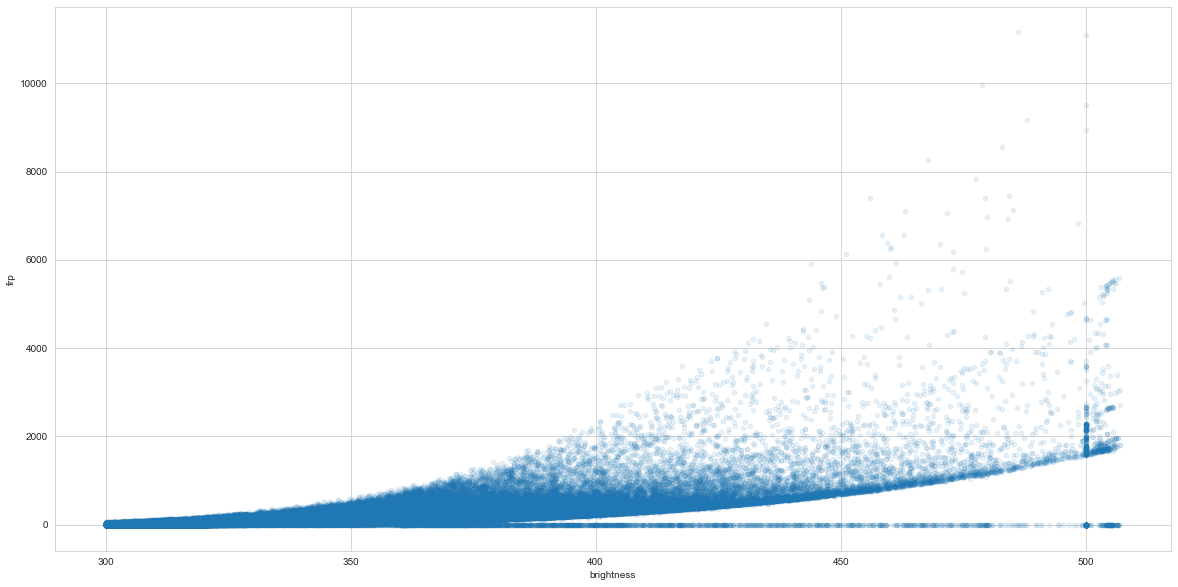

In [ ]:
dataset.plot(kind="scatter", x="brightness", y="frp",alpha=0.1,figsize=(20,10))

The data is getting more dispersed as the brightness increases so there is not a simple linear relation.

<AxesSubplot:xlabel='confidence', ylabel='frp'>

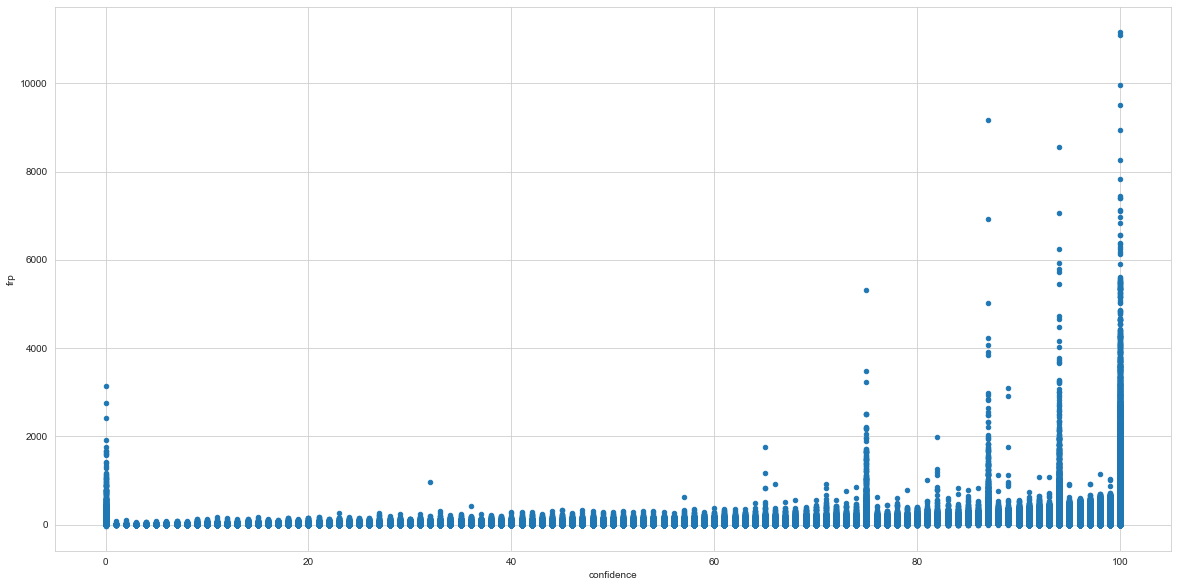

In [ ]:
dataset.plot(kind="scatter", x="confidence", y="frp",figsize=(20,10))

Confidence value is based on a collection of intermediate algorithm quantities used in the detection process. It is intended to help users gauge the quality of individual hotspot/fire pixels. Confidence estimates range between 0 and 100%

<AxesSubplot:xlabel='daynight', ylabel='frp'>

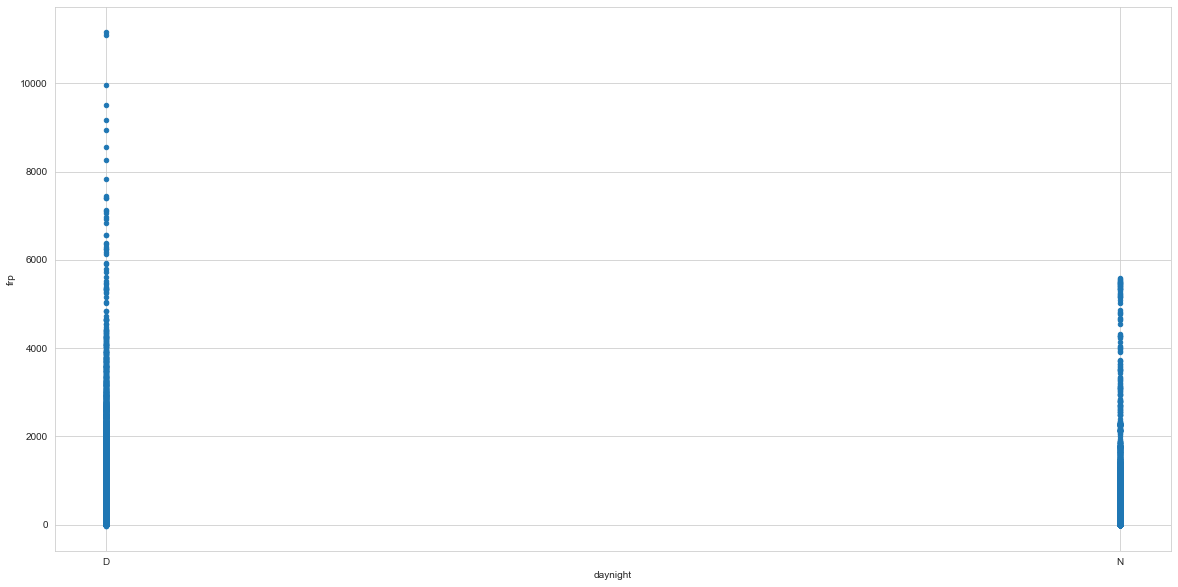

In [ ]:
dataset.plot(kind="scatter", x="daynight", y="frp",figsize=(20,10))

The highest frp value is obtained during the day time.

<AxesSubplot:xlabel='instrument', ylabel='frp'>

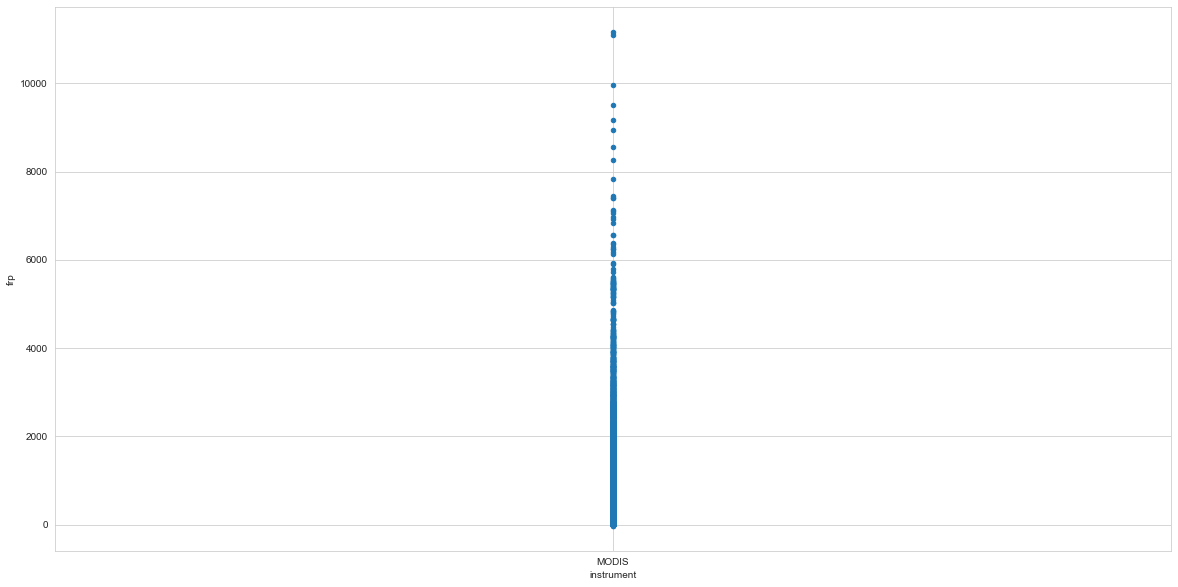

In [ ]:
dataset.plot(kind="scatter", x="instrument", y="frp",figsize=(20,10))

As we are using the data collected by the MODIS satellite it's very obvious that the instrument column will be containing only one categorical label i.e. MODIS

<AxesSubplot:xlabel='satellite', ylabel='frp'>

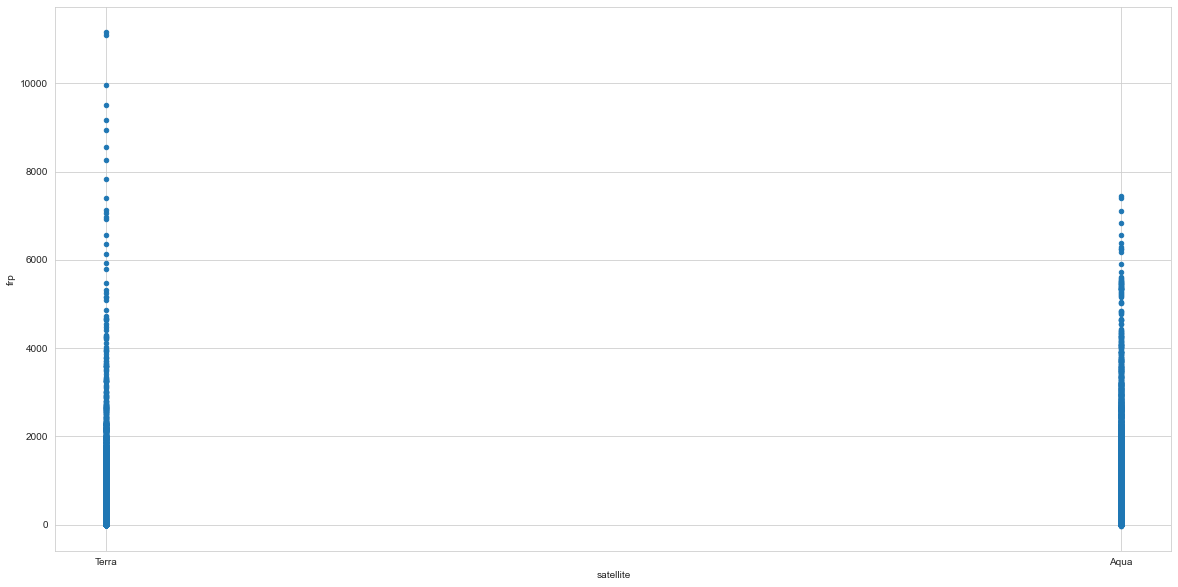

In [ ]:
dataset.plot(kind="scatter", x="satellite", y="frp",figsize=(20,10))

The highest frp value is obtained by the Terra satellite.

<AxesSubplot:xlabel='scan', ylabel='frp'>

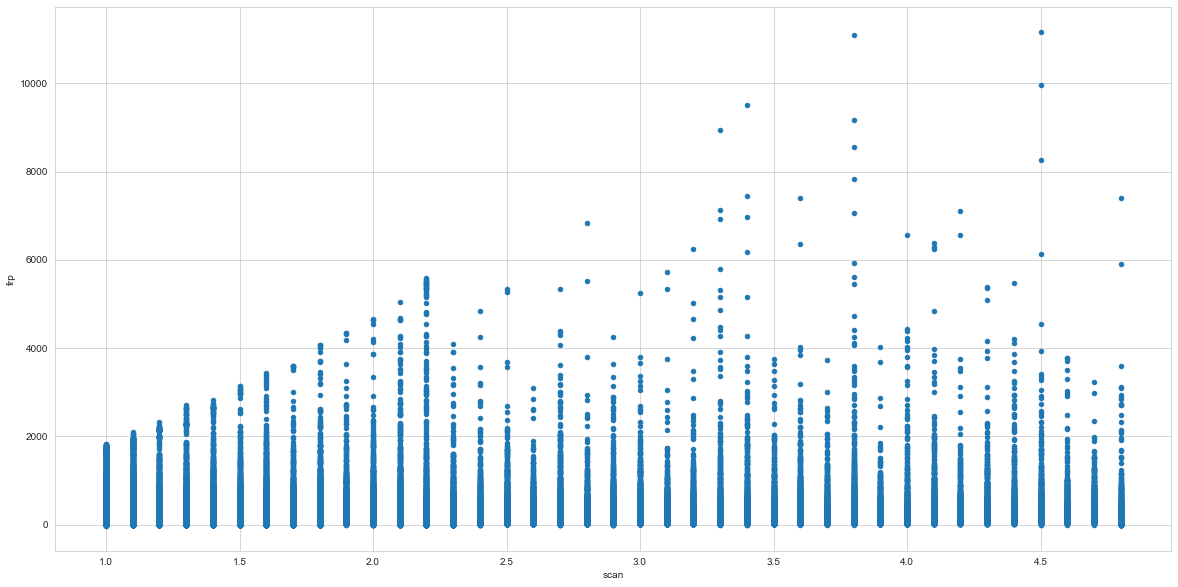

In [ ]:
dataset.plot(kind="scatter", x="scan", y="frp",figsize=(20,10))

<AxesSubplot:xlabel='track', ylabel='frp'>

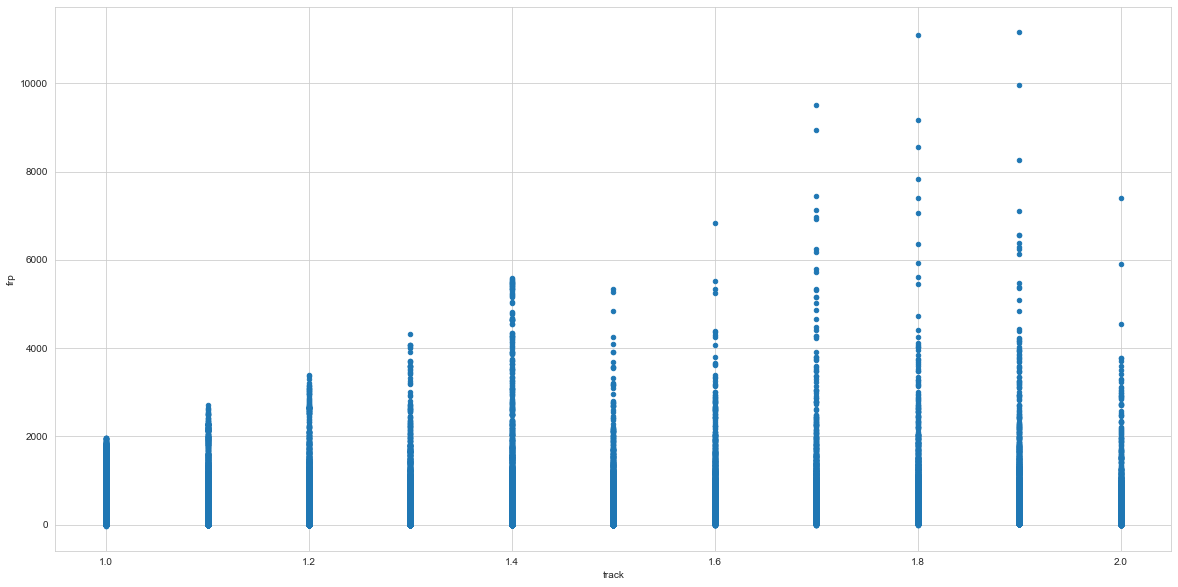

In [ ]:
dataset.plot(kind="scatter", x="track", y="frp",figsize=(20,10))

<AxesSubplot:xlabel='type', ylabel='frp'>

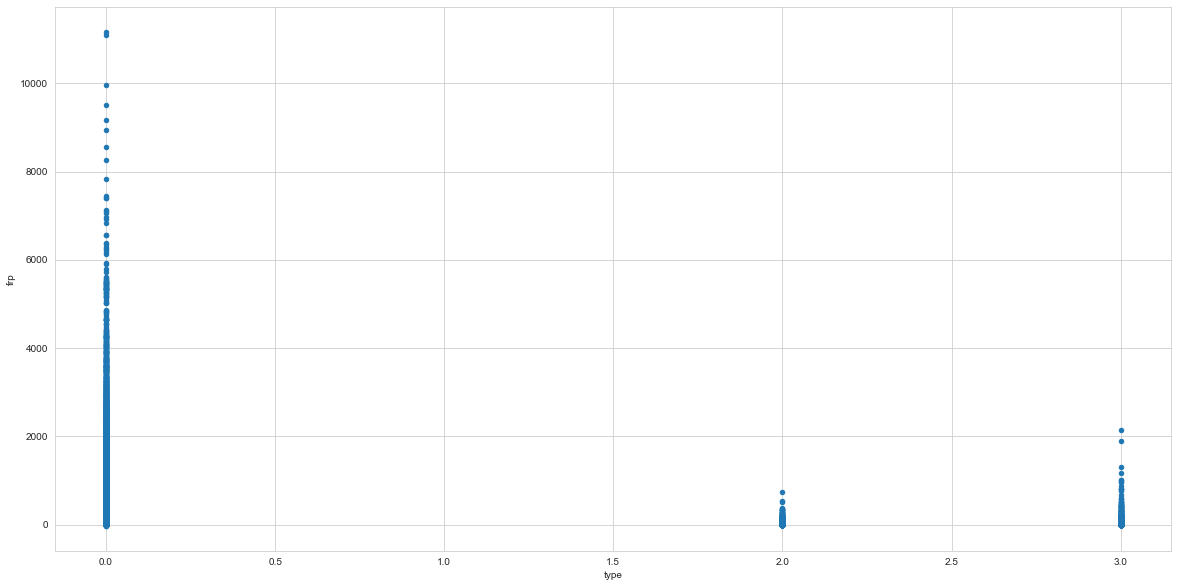

In [ ]:
dataset.plot(kind="scatter", x="type", y="frp",figsize=(20,10))

# Highest frp data points in the year 2018.

In [ ]:
data_2018=year_2018[year_2018["frp"]>5176]

In [ ]:
data_2018.shape

(8, 18)

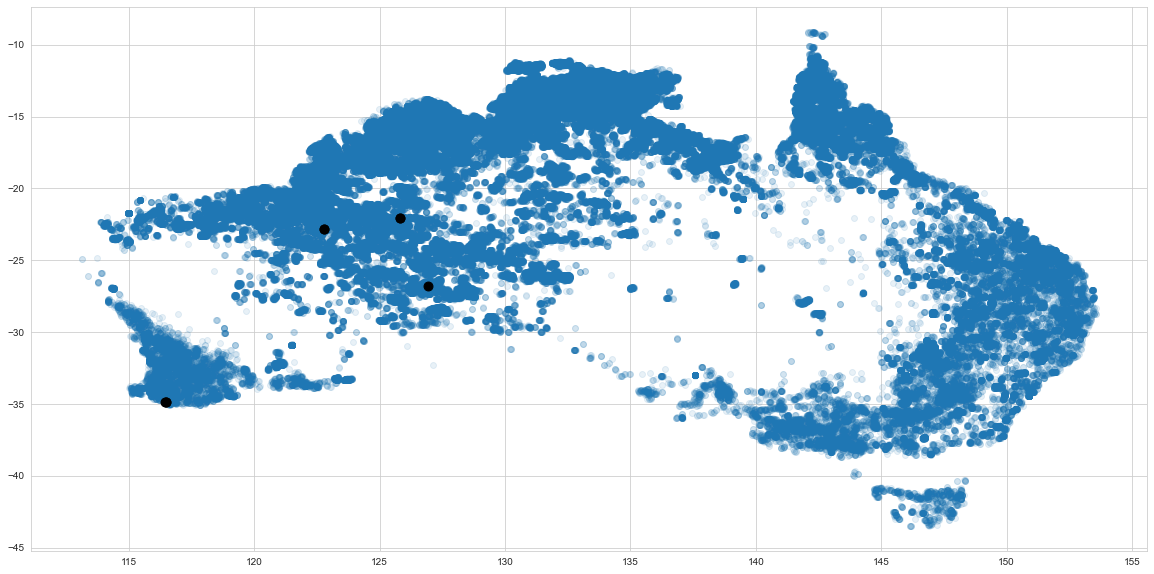

In [ ]:
plt.figure(figsize=(20,10))
plt.scatter(x=year_2018["longitude"], y=year_2018["latitude"],alpha=0.1)
plt.scatter(x=data_2018["longitude"], y=data_2018["latitude"],color="black",s=80,alpha=1)

The maximum value of the frp in the year 2018 was 7395.4 so we made 5176 as a thresold for the frp level to decide if the fire was intense or not.From this, we can see that the Western Australia had experienced very intense fires.

# 2018 map with the FRP level represented as shown in the colorbar.

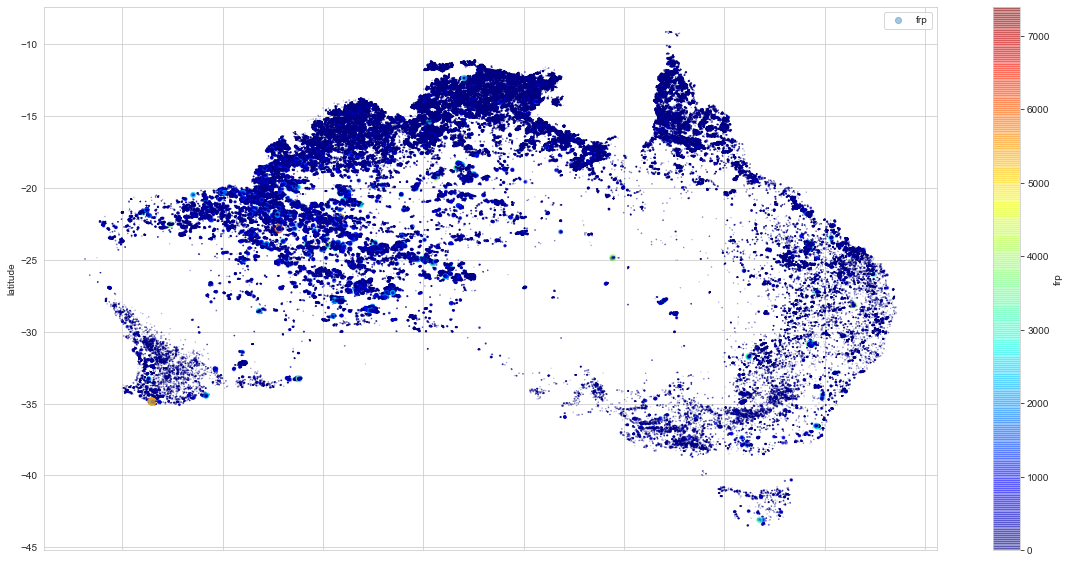

In [ ]:
year_2018.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,s=year_2018["frp"]/100,label="frp", figsize=(20,10),c="frp", cmap=plt.get_cmap("jet"), colorbar=True,)
plt.legend()

# Highest frp data points in the year 2019.

In [ ]:
data_2019=year_2019[year_2019["frp"]>5218]

In [ ]:
data_2019.shape

(36, 18)

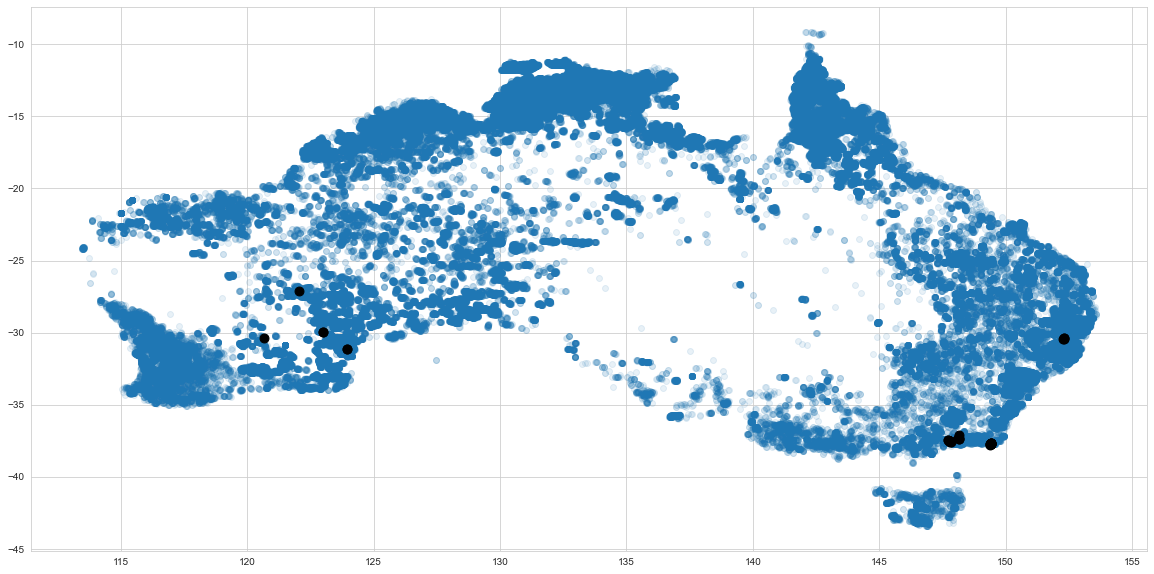

In [ ]:
plt.figure(figsize=(20,10))
plt.scatter(x=year_2019["longitude"], y=year_2019["latitude"],alpha=0.1)
plt.scatter(x=data_2019["longitude"], y=data_2019["latitude"],color="black",s=80,alpha=1)

The maximum value of the frp in the year 2019 was 7454.5 so we made 5218 as a thresold for the frp level to decide if the fire was intense or not.From this, we can see that the Western Australia and the South-east part of Austrailia (around Sydney) had experienced very intense fires.

# 2019 map with the FRP level represented as shown in the colorbar.

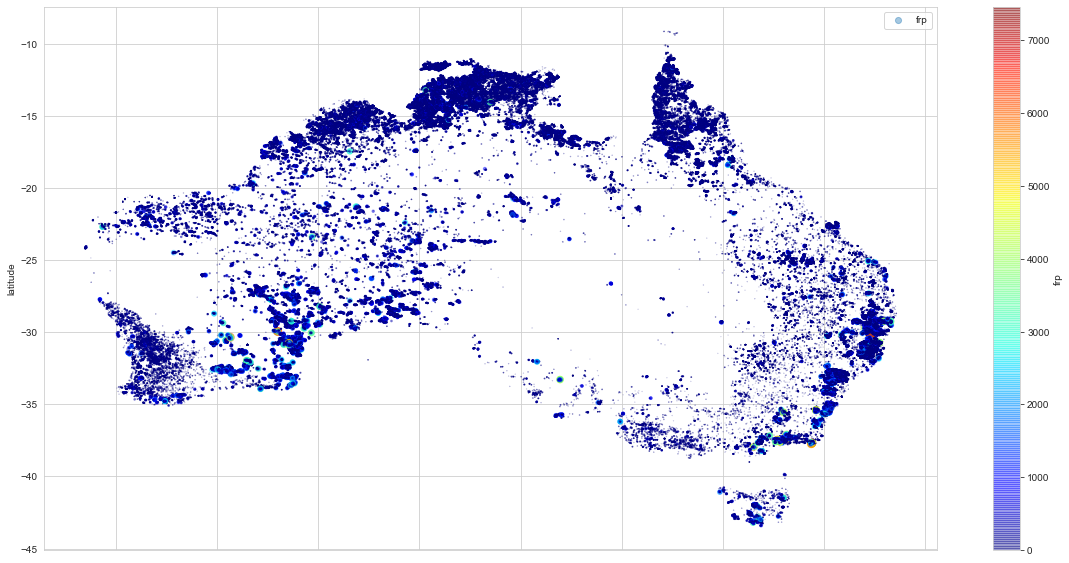

In [ ]:
year_2019.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,s=year_2019["frp"]/100,label="frp", figsize=(20,10),c="frp", cmap=plt.get_cmap("jet"), colorbar=True,)
plt.legend()

# Highest frp data points in the year 2020.

In [ ]:
data_2020=year_2020[year_2020["frp"]>7814]

In [ ]:
data_2020.shape

(9, 18)

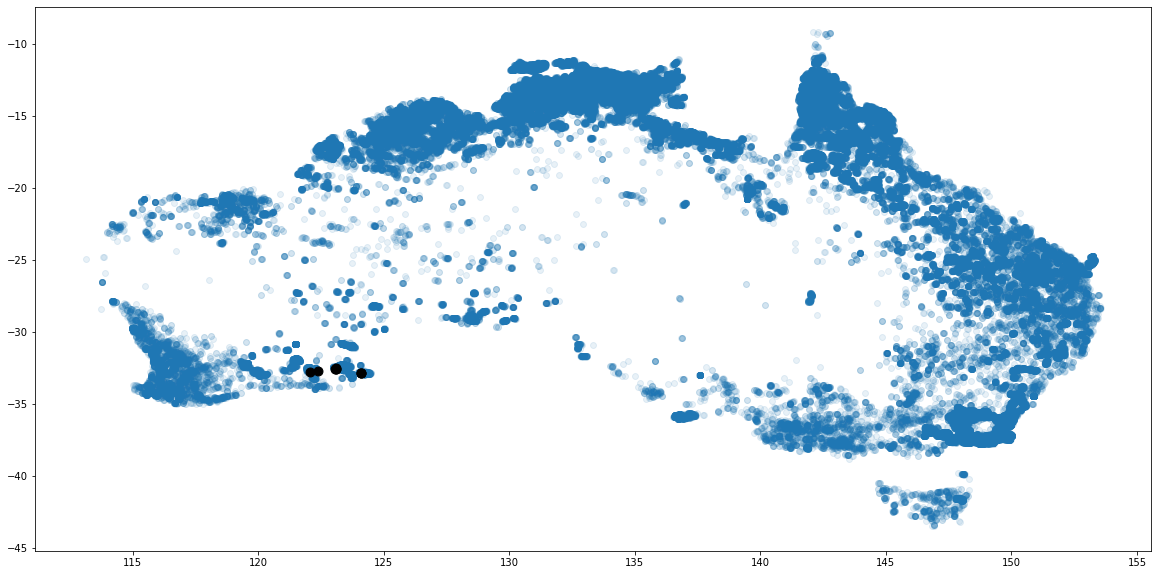

In [ ]:
plt.figure(figsize=(20,10))
plt.scatter(x=year_2020["longitude"], y=year_2020["latitude"],alpha=0.1)
plt.scatter(x=data_2020["longitude"], y=data_2020["latitude"],color="black",s=80,alpha=1)

The maximum value of the frp in the year 2020 was 11164.1 so we made 7814 as a thresold for the frp level to decide if the fire was intense or not.From this, we can see that the Western Australia had experienced very intense fires.According to the news in the year 2020 an emergency bushfire warning had been issued for areas on the Eyre Highway in Western Australia.The warning is for Balladonia Roadhouse, Point Culver, Israelite Bay, and Buraminya in the state.

# 2020 map with the FRP level represented as shown in the colorbar.

D:\Anaconda\lib\site-packages\matplotlib\collections.py:922: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


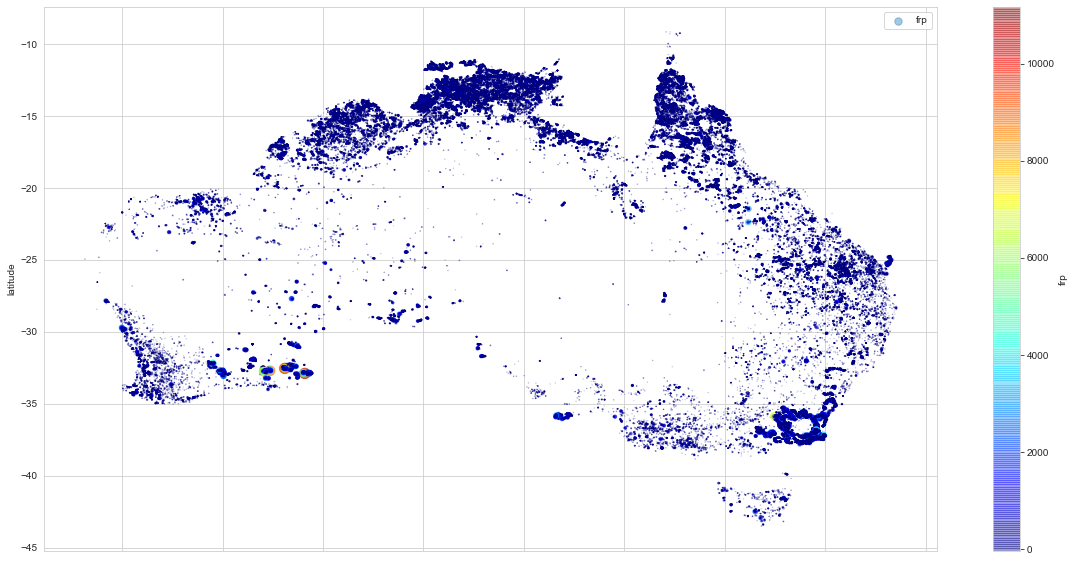

In [ ]:
year_2020.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,s=year_2020["frp"]/100,label="frp", figsize=(20,10),c="frp", cmap=plt.get_cmap("jet"), colorbar=True,)
plt.legend()

# Highest frp data points in the whole data (2018,2019,2020).

In [ ]:
data=dataset[dataset["frp"]>5176]

In [ ]:
data.shape

(66, 16)

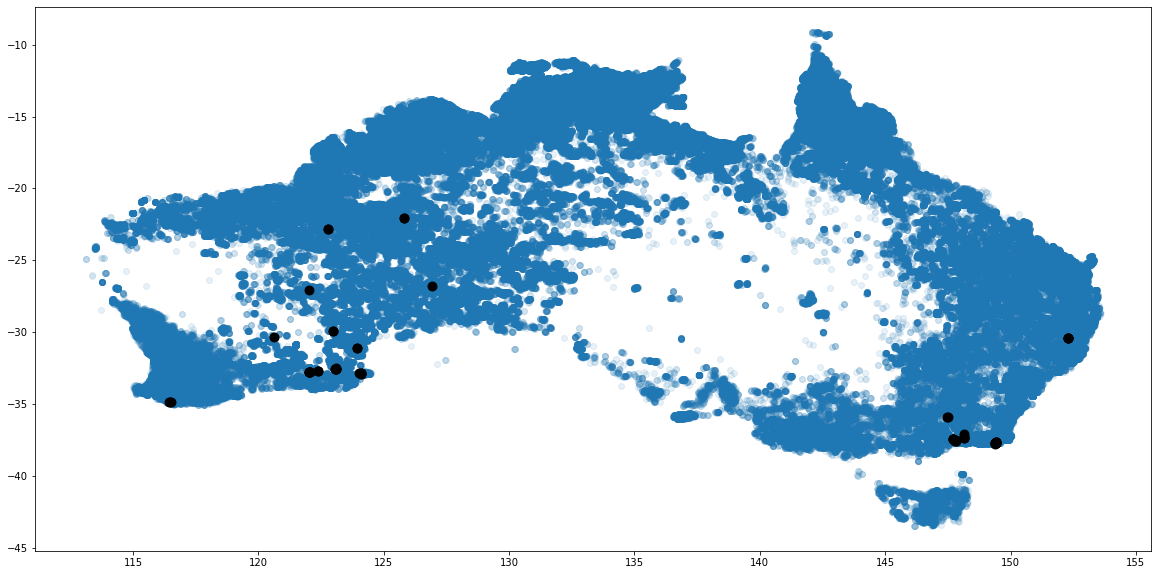

In [ ]:
plt.figure(figsize=(20,10))
plt.scatter(x=dataset["longitude"], y=dataset["latitude"],alpha=0.1)
plt.scatter(x=data["longitude"], y=data["latitude"],color="black",s=80,alpha=1)

There is no clear trend in these fires the fires are mostly contained along the Western Australia and the South-east part of Austrailia. Unfortuantely the intensity of the fires do not seem to have been suppressed as time progresses.

# This is the whole dataset (2018,2019,2020) map with the FRP level represented as shown in the colorbar.

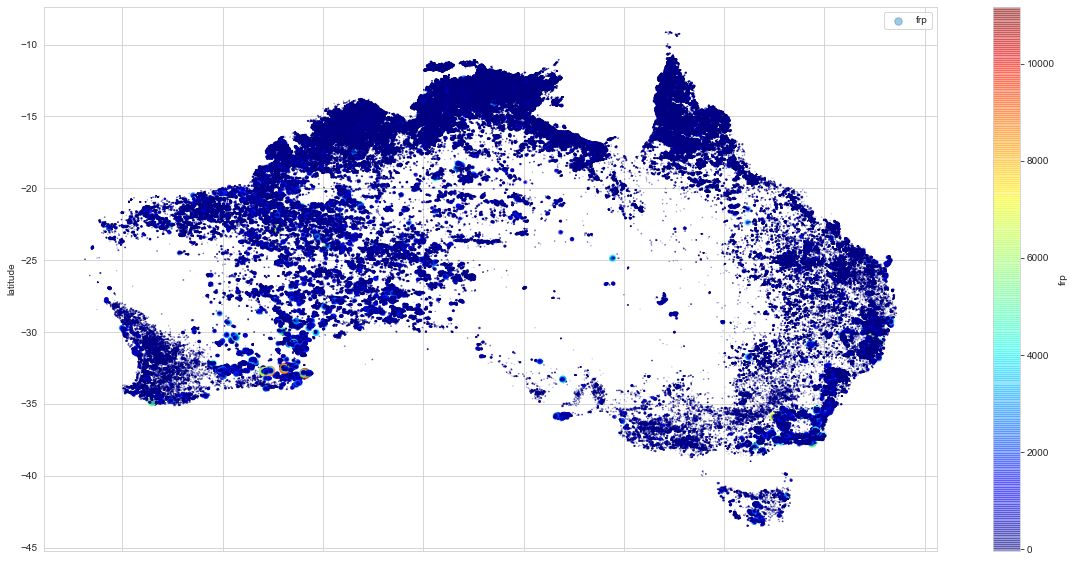

In [ ]:
dataset.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,s=dataset["frp"]/100,label="frp", figsize=(20,10),c="frp", cmap=plt.get_cmap("jet"), colorbar=True,)
plt.legend()

1. we can see that the Western Australia and the South-east part of Austrailia (around Sydney) are still unsafe and more prone to forest fires.<br>
2. Coastal areas of Queensland,Tasmania and Northern Australia are still a risky place.<br>
3. Central region of South Australia looks to be a safe place.

# To get some time specific information, let's differentiate daytime and nighttime  data.

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


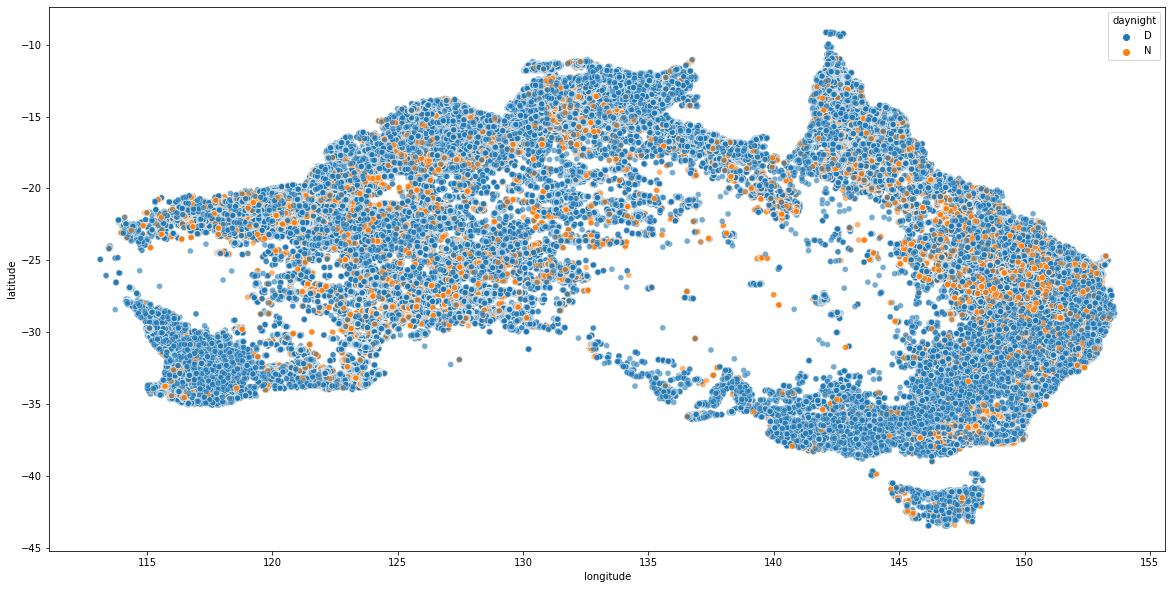

In [ ]:
import seaborn as sns
plt.figure(figsize=(20,10))
sns.scatterplot('longitude','latitude', data=dataset, hue='daynight',alpha=0.6)
plt.show()

# Fill missing values.

In [ ]:
train,test=train_test_split(dataset,test_size=0.2,random_state=0)

In [ ]:
train.shape,test.shape

((620008, 18), (155003, 18))

In [ ]:
train.isnull().sum()

latitude         0
longitude        0
brightness       0
scan             0
track            0
acq_date         0
acq_time         0
satellite        0
instrument       0
confidence       0
version          0
bright_t31       0
frp              0
daynight         0
type          4978
day              0
month            0
year             0
dtype: int64

The proportion of Type missing is likely small enough.

As type column consist of following values:<br>
0.0 = presumed vegetation fire<br>
1.0 = active volcano<br>
2.0 = other static land source<br>
3.0 = offshore<br>
As the value of the type column depends on the latitude and the longitude we can't replace the missing values with the mean,median or mode as it can result into assigning wrong values. So we tried using KNNImputer where each sample’s missing values are imputed using the mean value from n_neighbors nearest neighbors found in the training set but KNN Imputation struggles more with categorical data since all of the results must be rounded.So we will get rid of the tuples containing NAN values as the number of tuples with missing value of type is reasonably low and can be ignored from the huge sample size.

In [ ]:
train = train.dropna(subset=["type"])

In [ ]:
train.isnull().sum()

latitude      0
longitude     0
brightness    0
scan          0
track         0
acq_date      0
acq_time      0
satellite     0
instrument    0
confidence    0
version       0
bright_t31    0
frp           0
daynight      0
type          0
day           0
month         0
year          0
dtype: int64

In [ ]:
train["instrument"].value_counts()

MODIS    615030
Name: instrument, dtype: int64

We will be dropping instrument and acq_date column as the instrument column contains only one category i.e MODIS there is no use of having this column and as we are having day, month and year column there is no use of having acq_date column

In [ ]:
train=train.drop(["instrument","acq_date"],axis=1)
train.head()

latitude  longitude  brightness  scan  track  acq_time satellite  \
363991  -32.8816   117.2240       326.1   1.7    1.3       545      Aqua   
709390  -13.3783   135.1753       324.7   2.0    1.4       506      Aqua   
740021  -14.8343   144.5334       305.7   1.5    1.2      1317     Terra   
620288  -36.2605   150.0265       301.7   1.0    1.0      1258     Terra   
341080  -28.6469   124.0543       333.7   1.2    1.1       145     Terra   

        confidence version  bright_t31   frp daynight  type  day  month  year  
363991          77    6.03       305.1  28.8        D   0.0   23      4  2019  
709390          64    6.03       303.6  35.6        D   0.0   13      7  2020  
740021          62    6.03       293.6   9.3        N   0.0   13     10  2020  
620288          43    6.03       287.2   6.2        N   0.0    1      1  2020  
341080          22    6.03       317.2  14.2        D   0.0   23      2  2019

# Handling Non numeric (string/categorical) Attributes

In [ ]:
train["satellite"].value_counts()

Aqua     352161
Terra    262869
Name: satellite, dtype: int64

In [ ]:
train["daynight"].value_counts()

D    466692
N    148338
Name: daynight, dtype: int64

In [ ]:
train["version"].value_counts()

6.03    615030
Name: version, dtype: int64

In [ ]:
train["type"].value_counts()

0.0    609238
2.0      4684
3.0      1108
Name: type, dtype: int64

As the version cloumn is having only 1 category i.e 6.03 there is no use of having this column as it won't be adding any value in the prediction.

In [ ]:
train=train.drop(["version"],axis=1)
train.head()

latitude  longitude  brightness  scan  track  acq_time satellite  \
363991  -32.8816   117.2240       326.1   1.7    1.3       545      Aqua   
709390  -13.3783   135.1753       324.7   2.0    1.4       506      Aqua   
740021  -14.8343   144.5334       305.7   1.5    1.2      1317     Terra   
620288  -36.2605   150.0265       301.7   1.0    1.0      1258     Terra   
341080  -28.6469   124.0543       333.7   1.2    1.1       145     Terra   

        confidence  bright_t31   frp daynight  type  day  month  year  
363991          77       305.1  28.8        D   0.0   23      4  2019  
709390          64       303.6  35.6        D   0.0   13      7  2020  
740021          62       293.6   9.3        N   0.0   13     10  2020  
620288          43       287.2   6.2        N   0.0    1      1  2020  
341080          22       317.2  14.2        D   0.0   23      2  2019

In [ ]:
cat_cols=["satellite","daynight","type"]

In [ ]:
def category_to_numerical(cat_cols):
    df_final=train
    i=0
    for fields in cat_cols:
        print(fields)
        data=pd.get_dummies(train[fields],drop_first=True)
        train.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=data.copy()
        else:
            df_final=pd.concat([df_final,data],axis=1)
        i=i+1
    df_final=pd.concat([train,df_final],axis=1)
    return df_final

In [ ]:
train=category_to_numerical(cat_cols)

satellite
daynight
type


In [ ]:
train.shape

(615030, 16)

In [ ]:
train.head()

latitude  longitude  brightness  scan  track  acq_time  confidence  \
363991  -32.8816   117.2240       326.1   1.7    1.3       545          77   
709390  -13.3783   135.1753       324.7   2.0    1.4       506          64   
740021  -14.8343   144.5334       305.7   1.5    1.2      1317          62   
620288  -36.2605   150.0265       301.7   1.0    1.0      1258          43   
341080  -28.6469   124.0543       333.7   1.2    1.1       145          22   

        bright_t31   frp  day  month  year  Terra  N  2.0  3.0  
363991       305.1  28.8   23      4  2019      0  0    0    0  
709390       303.6  35.6   13      7  2020      0  0    0    0  
740021       293.6   9.3   13     10  2020      1  1    0    0  
620288       287.2   6.2    1      1  2020      1  1    0    0  
341080       317.2  14.2   23      2  2019      1  0    0    0

In [ ]:
train.rename(columns = {'Terra':'satellite','N':'daynight',2.0:'other_static_land_source',3.0:'offshore'}, inplace = True)

In [ ]:
train.head()

latitude  longitude  brightness  scan  track  acq_time  confidence  \
363991  -32.8816   117.2240       326.1   1.7    1.3       545          77   
709390  -13.3783   135.1753       324.7   2.0    1.4       506          64   
740021  -14.8343   144.5334       305.7   1.5    1.2      1317          62   
620288  -36.2605   150.0265       301.7   1.0    1.0      1258          43   
341080  -28.6469   124.0543       333.7   1.2    1.1       145          22   

        bright_t31   frp  day  month  year  satellite  daynight  \
363991       305.1  28.8   23      4  2019          0         0   
709390       303.6  35.6   13      7  2020          0         0   
740021       293.6   9.3   13     10  2020          1         1   
620288       287.2   6.2    1      1  2020          1         1   
341080       317.2  14.2   23      2  2019          1         0   

        other_static_land_source  offshore  
363991                         0         0  
709390                         0         0  
740021                         0         0  
620288                         0         0  
341080                         0         0

so in the satellite column 1 means Terra and 0 means Aqua and in daynight column 1 means day and 0 means night.  

In [ ]:
train.isnull().sum()

latitude                    0
longitude                   0
brightness                  0
scan                        0
track                       0
acq_time                    0
confidence                  0
bright_t31                  0
frp                         0
day                         0
month                       0
year                        0
satellite                   0
daynight                    0
other_static_land_source    0
offshore                    0
dtype: int64

In [ ]:
train.shape

(615030, 16)

In [ ]:
train.head()

latitude  longitude  brightness  scan  track  acq_time  confidence  \
363991  -32.8816   117.2240       326.1   1.7    1.3       545          77   
709390  -13.3783   135.1753       324.7   2.0    1.4       506          64   
740021  -14.8343   144.5334       305.7   1.5    1.2      1317          62   
620288  -36.2605   150.0265       301.7   1.0    1.0      1258          43   
341080  -28.6469   124.0543       333.7   1.2    1.1       145          22   

        bright_t31   frp  day  month  year  satellite  daynight  \
363991       305.1  28.8   23      4  2019          0         0   
709390       303.6  35.6   13      7  2020          0         0   
740021       293.6   9.3   13     10  2020          1         1   
620288       287.2   6.2    1      1  2020          1         1   
341080       317.2  14.2   23      2  2019          1         0   

        other_static_land_source  offshore  
363991                         0         0  
709390                         0         0  
740021                         0         0  
620288                         0         0  
341080                         0         0

<AxesSubplot:>

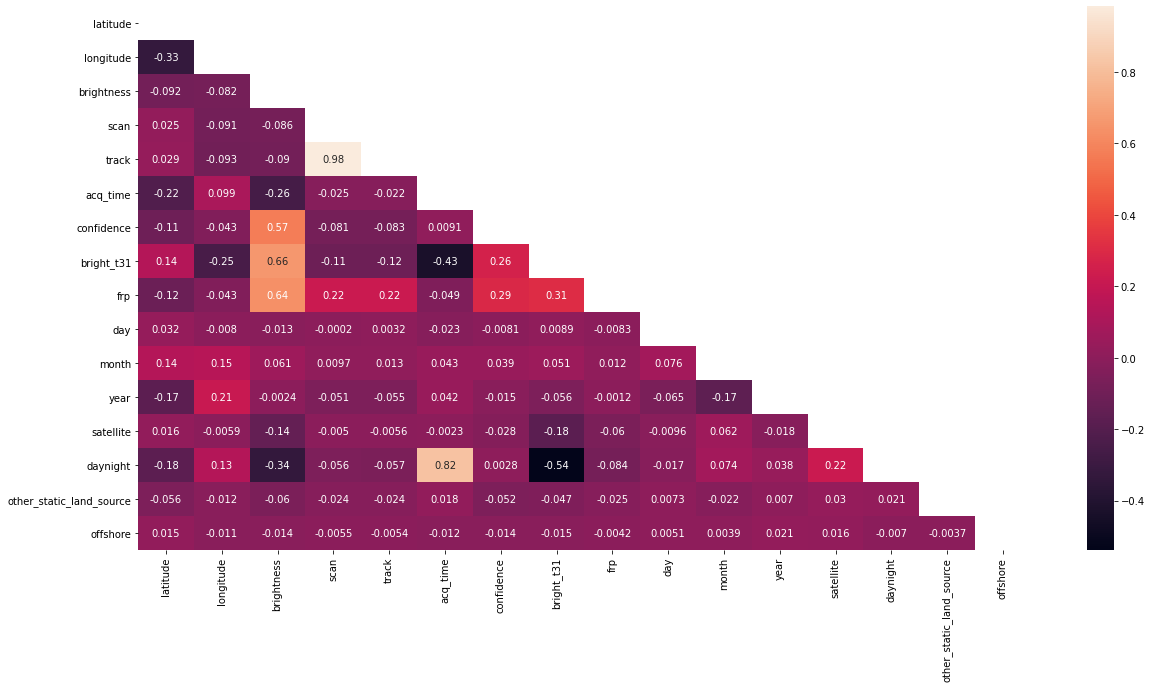

In [ ]:
plt.figure(figsize=(20,10))
corr=train.corr()
mat=np.triu(corr)
sns.heatmap(corr,mask=mat,annot=True)

In [ ]:
y_train=train["frp"]
x_train=train.drop("frp",axis=1)

In [ ]:
x_train.shape,y_train.shape

((615030, 15), (615030,))

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
extra_tree_regressor=ExtraTreesRegressor(n_jobs=-1)
extra_tree_regressor.fit(x_train,y_train)

ExtraTreesRegressor(n_jobs=-1)

In [ ]:
print(extra_tree_regressor.feature_importances_)

[9.73815105e-03 6.70976718e-03 6.09985404e-01 1.41454495e-01
 1.54344739e-01 3.86171529e-03 3.69123907e-02 1.84041098e-02
 3.99364920e-03 2.89941303e-03 2.85424633e-03 1.13682001e-03
 7.01655641e-03 4.25863231e-06 6.84284310e-04]


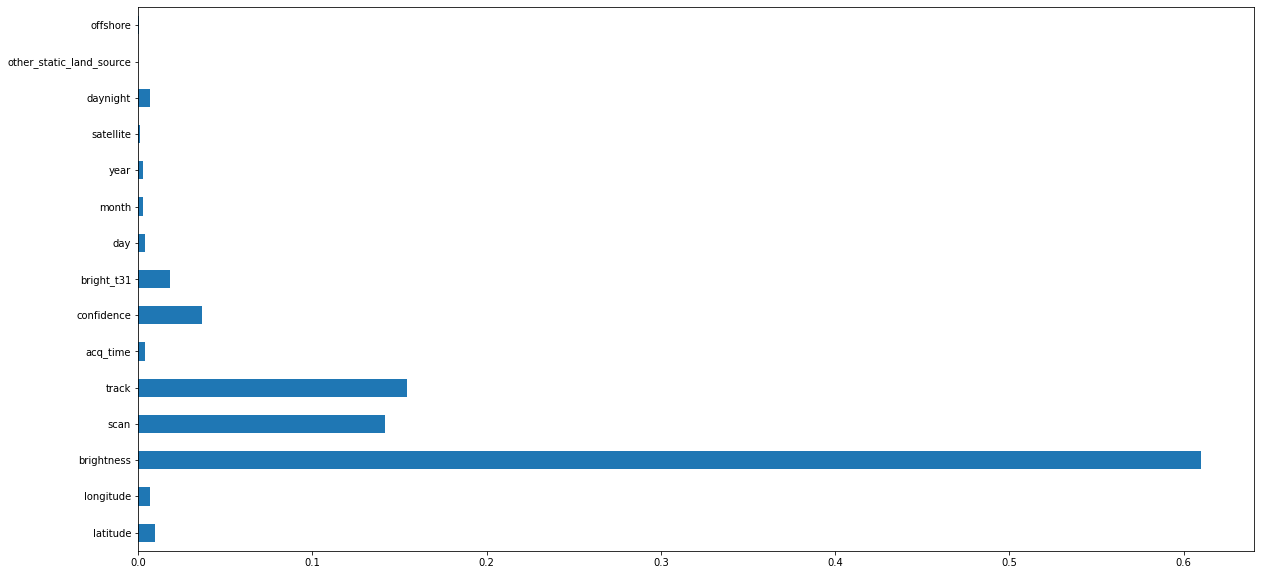

In [ ]:
feature_imp=pd.Series(extra_tree_regressor.feature_importances_,index=x_train.columns)
feature_imp.plot(kind="barh",figsize=(20,10))
plt.show()

In [ ]:
x_train.columns

Index(['latitude', 'longitude', 'brightness', 'scan', 'track', 'acq_time',
       'confidence', 'bright_t31', 'day', 'month', 'year', 'satellite',
       'daynight', 'other_static_land_source', 'offshore'],
      dtype='object')

In [ ]:
x_train=x_train.drop(['bright_t31','scan','satellite','other_static_land_source', 'offshore'],axis=1)
x_train.head()

latitude  longitude  brightness  track  acq_time  confidence  day  \
363991  -32.8816   117.2240       326.1    1.3       545          77   23   
709390  -13.3783   135.1753       324.7    1.4       506          64   13   
740021  -14.8343   144.5334       305.7    1.2      1317          62   13   
620288  -36.2605   150.0265       301.7    1.0      1258          43    1   
341080  -28.6469   124.0543       333.7    1.1       145          22   23   

        month  year  daynight  
363991      4  2019         0  
709390      7  2020         0  
740021     10  2020         1  
620288      1  2020         1  
341080      2  2019         0

In [ ]:
x_train.shape

(615030, 10)

In [ ]:
x_train.columns

Index(['latitude', 'longitude', 'brightness', 'track', 'acq_time',
       'confidence', 'day', 'month', 'year', 'daynight'],
      dtype='object')

In [ ]:
y_test=test["frp"]
x_test=test.drop("frp",axis=1)

In [ ]:
x_test=x_test.drop(['bright_t31','scan','acq_date','satellite','instrument','version','type'],axis=1)

In [ ]:
x_test.shape

(155003, 10)

In [ ]:
x_test.head()

latitude  longitude  brightness  track  acq_time  confidence daynight  \
490406  -30.9274   152.0641       308.0    1.0      1506          29        N   
685320  -15.1868   143.6636       313.6    1.3       429          32        D   
420974  -14.8133   130.1699       328.2    1.2       518          57        D   
524624  -31.5221   151.8259       322.1    1.1      1453          18        N   
373156  -15.2236   126.1541       321.0    1.2       537          48        D   

        day  month  year  
490406    1     11  2019  
685320   16      5  2020  
420974   25      7  2019  
524624   19     11  2019  
373156   11      5  2019

In [ ]:
cat_cols=["daynight"]

In [ ]:
def category_to_numerical(cat_cols):
    df_final=x_test
    i=0
    for fields in cat_cols:
        print(fields)
        data=pd.get_dummies(x_test[fields],drop_first=True)
        x_test.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=data.copy()
        else:
            df_final=pd.concat([df_final,data],axis=1)
        i=i+1
    df_final=pd.concat([x_test,df_final],axis=1)
    return df_final

In [ ]:
x_test=category_to_numerical(cat_cols)

daynight


In [ ]:
x_test.shape

(155003, 10)

In [ ]:
x_test.head()

latitude  longitude  brightness  track  acq_time  confidence  day  \
490406  -30.9274   152.0641       308.0    1.0      1506          29    1   
685320  -15.1868   143.6636       313.6    1.3       429          32   16   
420974  -14.8133   130.1699       328.2    1.2       518          57   25   
524624  -31.5221   151.8259       322.1    1.1      1453          18   19   
373156  -15.2236   126.1541       321.0    1.2       537          48   11   

        month  year  N  
490406     11  2019  1  
685320      5  2020  0  
420974      7  2019  0  
524624     11  2019  1  
373156      5  2019  0

In [ ]:
x_test.rename(columns = {'N':'daynight'}, inplace = True)

In [ ]:
x_test.head()

latitude  longitude  brightness  track  acq_time  confidence  day  \
490406  -30.9274   152.0641       308.0    1.0      1506          29    1   
685320  -15.1868   143.6636       313.6    1.3       429          32   16   
420974  -14.8133   130.1699       328.2    1.2       518          57   25   
524624  -31.5221   151.8259       322.1    1.1      1453          18   19   
373156  -15.2236   126.1541       321.0    1.2       537          48   11   

        month  year  daynight  
490406     11  2019         1  
685320      5  2020         0  
420974      7  2019         0  
524624     11  2019         1  
373156      5  2019         0

# Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
regr=LinearRegression()
regr.fit(x_train, y_train)
print(regr.intercept_)
print(regr.coef_)

2515.6963536983785
[-3.65532753e-01  3.58908208e-01  6.13598224e+00  1.98391730e+02
 -3.68317814e-04 -1.18268295e+00  1.52616421e-01 -2.69432870e+00
 -2.33137341e+00  8.51308670e+01]


In [ ]:
y_predict=regr.predict(x_test)

In [ ]:
print('R-squared value:',regr.score(x_test,y_test))

R-squared value: 0.5337979694929548


In [ ]:
from sklearn import metrics
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

Root Mean Squared Error: 115.24556061399352


## StandardScaler

In [ ]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
from sklearn.linear_model import LinearRegression
regr=LinearRegression()
regr.fit(x_train, y_train)
print(regr.intercept_)
print(regr.coef_)

69.76426629595319
[ -2.99077887   3.86342338 142.95081216  50.51198972  -0.19980813
 -27.42974722   1.35433283  -9.57392932  -1.73468919  36.41934608]


In [ ]:
y_predict=regr.predict(x_test)

In [ ]:
print('R-squared value:',regr.score(x_test,y_test))

R-squared value: 0.5337979694929548


In [ ]:
from sklearn import metrics
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

Root Mean Squared Error: 115.24556061399352


# Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
ridge=Ridge()
parameters = {"alpha":[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring="neg_mean_squared_error",cv=5)
ridge_regressor.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [ ]:
print(ridge_regressor.best_params_)                   #Lambda value
print(ridge_regressor.best_score_)                    #Mean Square Error

{'alpha': 1}
-13937.166923570447


In [ ]:
regr = Ridge(alpha=1)
regr.fit(x_train, y_train)

Ridge(alpha=1)

In [ ]:
y_predict=regr.predict(x_test)

In [ ]:
print('R-squared value:',regr.score(x_test,y_test))

R-squared value: 0.5337980406091308


In [ ]:
from sklearn import metrics
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

Root Mean Squared Error: 115.2455518240019


# Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso
lasso=Lasso()
parameters = {"alpha":[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
lasso_regressor=GridSearchCV(ridge,parameters,scoring="neg_mean_squared_error",cv=5)
lasso_regressor.fit(x_train,y_train)

D:\Anaconda\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.71994e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
D:\Anaconda\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.71991e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
D:\Anaconda\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.71835e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
D:\Anaconda\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.08106e-22): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
D:\Anaconda\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.71994e-22): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
D:\Anaconda\lib\site

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [ ]:
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 35}
-13818.930022143386


In [ ]:
from sklearn import linear_model
regr = linear_model.Lasso(alpha=35)
regr.fit(x_train, y_train)

Lasso(alpha=35)

In [ ]:
y_predict=regr.predict(x_test)

In [ ]:
print('R-squared value:',regr.score(x_test,y_test))

R-squared value: 0.4392259995740819


In [ ]:
from sklearn import metrics
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

Root Mean Squared Error: 126.39533912632736


# KNeighborsRegressor

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knnregressor=KNeighborsRegressor(n_neighbors=3,weights='distance',algorithm='ball_tree',n_jobs=-1)
knnregressor.fit(x_train,y_train)

KNeighborsRegressor(algorithm='ball_tree', n_jobs=-1, n_neighbors=3,
                    weights='distance')

In [ ]:
y_predict=knnregressor.predict(x_test)

In [ ]:
print("Mean Accuracy: ",knnregressor.score(x_test,y_test))

Mean Accuracy:  0.889803830806773


In [ ]:
from sklearn import metrics
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

Root Mean Squared Error: 56.02996782890867


In [ ]:
k_values=np.arange(1,10,2)
print(k_values)

[1 3 5 7 9]


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
train_score_arr=[]
val_score_arrr=[]
for k in k_values:
    model=KNeighborsRegressor(n_neighbors=k,weights="distance",algorithm="ball_tree")
    model.fit(x_train,y_train)
    train_score=model.score(x_train,y_train)
    train_score_arr.append(train_score*100)
    val_score=model.score(x_test,y_test)
    val_score_arrr.append(val_score*100)
    print("k=%d, train_accuracy=%.2f%%, test_accuracy=%.2f%%" % (k, train_score * 100, val_score*100))

k=1, train_accuracy=100.00%, test_accuracy=86.71%
k=3, train_accuracy=100.00%, test_accuracy=88.98%
k=5, train_accuracy=100.00%, test_accuracy=89.19%
k=7, train_accuracy=100.00%, test_accuracy=88.91%
k=9, train_accuracy=100.00%, test_accuracy=88.41%


# Using Standard Scaler

In [ ]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
train_score_arr=[]
val_score_arrr=[]
for k in k_values:
    model=KNeighborsRegressor(n_neighbors=k,weights="distance",algorithm="ball_tree",n_jobs=-1)
    model.fit(x_train,y_train)
    train_score=model.score(x_train,y_train)
    train_score_arr.append(train_score*100)
    val_score=model.score(x_test,y_test)
    val_score_arrr.append(val_score*100)
    print("k=%d, train_accuracy=%.2f%%, test_accuracy=%.2f%%" % (k, train_score * 100, val_score*100))

k=1, train_accuracy=100.00%, test_accuracy=93.38%
k=3, train_accuracy=100.00%, test_accuracy=94.75%
k=5, train_accuracy=100.00%, test_accuracy=94.74%
k=7, train_accuracy=100.00%, test_accuracy=94.67%
k=9, train_accuracy=100.00%, test_accuracy=94.56%


# Using Robust Scaler

In [ ]:
from sklearn.preprocessing import RobustScaler
rc = RobustScaler()
x_train = rc.fit_transform(x_train)
x_test = rc.transform(x_test)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knnregressor=KNeighborsRegressor(n_neighbors=3,weights='distance',algorithm='ball_tree',n_jobs=-1)
knnregressor.fit(x_train,y_train)

KNeighborsRegressor(algorithm='ball_tree', n_jobs=-1, n_neighbors=3,
                    weights='distance')

In [ ]:
y_predict=knnregressor.predict(x_test)

In [ ]:
print("Mean Accuracy: ",knnregressor.score(x_test,y_test))

Mean Accuracy:  0.9508255478030595


In [ ]:
from sklearn import metrics
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

Root Mean Squared Error: 37.42888500517451


# DecisionTreeRegressor

In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
model=tree.DecisionTreeRegressor()
model=model.fit(x_train,y_train)

In [ ]:
y_predict=model.predict(x_test)

In [ ]:
print("R-squared value on training data: ",model.score(x_train,y_train))

R-squared value on training data:  1.0


In [ ]:
print("R-squared value on testing data: ",model.score(x_test,y_test))

R-squared value on testing data:  0.9523390622224299


In [ ]:
from sklearn import metrics
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

Root Mean Squared Error: 36.848381429009805


In Decision Tree Regressor a small change in the data can cause a large change in the structure of the decision tree causing instability.

# Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

D:\Anaconda\envs\forestfireprediction\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [ ]:
regr_rf_model = RandomForestRegressor(max_depth=17,random_state=0,n_estimators=40,n_jobs=-1)
regr_rf_model.fit(x_train,y_train)

RandomForestRegressor(max_depth=17, n_estimators=40, n_jobs=-1, random_state=0)

In [ ]:
print("R-squared value on training data: ",regr_rf_model.score(x_train,y_train))

R-squared value on training data:  0.9943004681421386


In [ ]:
print("R-squared value on testing data: ",regr_rf_model.score(x_test,y_test))

R-squared value on testing data:  0.9702439559032449


In [ ]:
y_predict=regr_rf_model.predict(x_test)

In [ ]:
y_predict

array([ 8.26161153, 13.10543275, 23.67164905, ..., 90.46497621,
       18.15655312, 38.53158544])

In [ ]:
from sklearn import metrics
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

Root Mean Squared Error: 29.115531421930434


D:\Anaconda\envs\forestfireprediction\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='frp', ylabel='Density'>

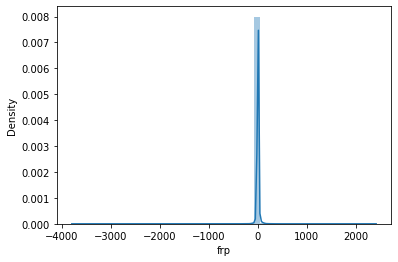

In [ ]:
sns.distplot(y_test-y_predict)

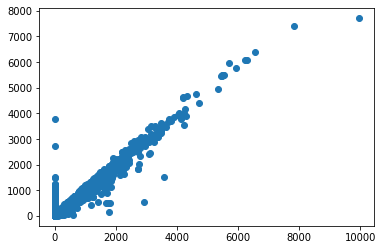

In [ ]:
plt.scatter(y_test,y_predict)

In the above graph we can see that the values of y_test and y_pred are almost lying in a line itself. So that is why this model seems to be good.

# Creation of validation set

In [ ]:
xtrain2,validation_set_x,ytrain2,validation_set_y=train_test_split(x_train,y_train,test_size=0.2,random_state=0)

In [ ]:
validation_set_x.shape

(30752, 6)

In [ ]:
validation_set_y.shape

(30752,)

# Hyperparameter tuning using Optuna

In [ ]:
import optuna
import sklearn
from sklearn.ensemble import RandomForestRegressor

def objective(trial):


    n_estimators = trial.suggest_int('n_estimators',10,500)
    max_depth = trial.suggest_int('max_depth', 5,100, log=True)
    min_samples_split=trial.suggest_int('min_samples_split',1,100,1)
    min_samples_leaf=trial.suggest_int('min_samples_leaf',1,100,1)

    clf = sklearn.ensemble.RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth,min_samples_split=min_samples_split,min_samples_leaf=min_samples_leaf)

    return sklearn.model_selection.cross_val_score(clf,validation_set_x ,validation_set_y , n_jobs=-1, cv=3).mean()

In [ ]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

trial = study.best_trial

print('Accuracy: {}'.format(trial.value))
print("Best hyperparameters: {}".format(trial.params))

[I 2021-04-17 14:28:49,017] A new study created in memory with name: no-name-a72a0e6a-1d49-4443-b6d5-57951191e4ef
[I 2021-04-17 14:35:07,787] Trial 0 finished with value: 0.9024187487741089 and parameters: {'n_estimators': 480, 'max_depth': 25, 'min_samples_split': 57, 'min_samples_leaf': 22}. Best is trial 0 with value: 0.9024187487741089.
[I 2021-04-17 14:35:40,832] Trial 1 finished with value: 0.8968984670272474 and parameters: {'n_estimators': 54, 'max_depth': 10, 'min_samples_split': 30, 'min_samples_leaf': 26}. Best is trial 0 with value: 0.9024187487741089.
[I 2021-04-17 14:37:05,088] Trial 2 finished with value: 0.8677383769519283 and parameters: {'n_estimators': 110, 'max_depth': 47, 'min_samples_split': 57, 'min_samples_leaf': 50}. Best is trial 0 with value: 0.9024187487741089.
[I 2021-04-17 14:37:29,271] Trial 3 finished with value: 0.8616638372035074 and parameters: {'n_estimators': 66, 'max_depth': 5, 'min_samples_split': 73, 'min_samples_leaf': 45}. Best is trial 0 with 

Accuracy: 0.9530257812420065
Best hyperparameters: {'n_estimators': 82, 'max_depth': 30, 'min_samples_split': 2, 'min_samples_leaf': 1}


In [ ]:
study.best_params

{'n_estimators': 82,
 'max_depth': 30,
 'min_samples_split': 2,
 'min_samples_leaf': 1}

In [ ]:
rf_model=RandomForestRegressor(n_estimators=82,max_depth=30,min_samples_split=2,min_samples_leaf=1,n_jobs=-1)
rf_model.fit(x_train,y_train)

RandomForestRegressor(max_depth=30, n_estimators=82, n_jobs=-1)

In [ ]:
y_pred=rf_model.predict(x_test)

In [ ]:
print("R-squared value on training data: ",rf_model.score(x_train,y_train))

R-squared value on training data:  0.9960664850621485


In [ ]:
print("R-squared value on testing data: ",rf_model.score(x_test,y_test))

R-squared value on testing data:  0.9722030249450585


In [ ]:
from sklearn import metrics
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Squared Error: 28.14076459429968


D:\Anaconda\envs\forestfireprediction\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='frp', ylabel='Density'>

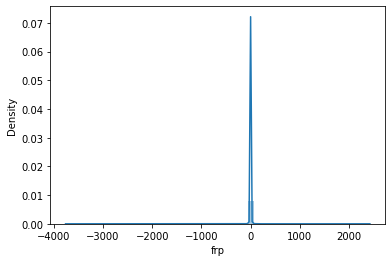

In [ ]:
sns.distplot(y_test-y_pred)

We get a close Gaussian Distribution graph which means that the difference is very very minimal.

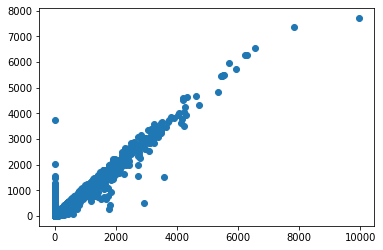

In [ ]:
plt.scatter(y_test,y_pred)

In the above graph we can see that the values of y_test and y_pred are almost lying in a line itself.

In [ ]:
import pickle
with open('Forest_Fire_Prediction.pkl','wb') as fh:
    pickle.dump(rf_model, fh)

In [ ]:
import pickle
pickle_off = open ("Forest_Fire_Prediction.pkl", "rb")
file = pickle.load(pickle_off)
print(file)

RandomForestRegressor(max_depth=30, n_estimators=82, n_jobs=-1)
